In [1]:
import sys
import json

with open('./paths', 'r') as f:
    globals().update(json.loads(f.read()))

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as plotcm
import copy
from plotly import express as px
%matplotlib inline

In [3]:
import sklearn.preprocessing as skprep
import sklearn.metrics as skmet

In [4]:
sys.path.append(path_Modules_Product_)
sys.path.append(path_Modules_Toolbox_)

In [5]:
import importlib
import data_processing as myprep
import handles as myhandles
import plots as myplots

from IPython.display import Javascript
from IPython.display import display
import IPython
from ipywidgets import interact

# Corr

In [10]:
from sklearn.preprocessing import QuantileTransformer as qter
from sklearn.preprocessing import PowerTransformer as pter

## OOB C

In [57]:
dataset_ = pd.read_csv('../Data/processed/dataset/ds_OOB_C.csv', index_col=0)
marks = [ #'p_HE4_C', 'p_HE4_L',
    'p_APO', 'p_B2M', 'p_CA125', 'p_CA15-3', 'p_CA19-9', 'p_CA72-4', 'p_CTAP',
    'p_EGFR', 'p_EOTAXIN',  'p_HE4_U', 'p_HEPC', 'p_IGF2',
    'p_IGFBP2', 'p_ITIH4', 'p_KLK6', 'p_LEPTIN', 'p_MESOTHELIN', 'p_MIF',
    'p_MMP3', 'p_MMP7', 'p_OPN', 'p_OV110', 'p_PROLACTIN', 'p_SLPI',
    'p_SPONDIN', 'p_SVCAM', 'p_TRF', 'p_TT'
]
marks.sort()
dataset = dataset_.dropna(subset=marks)
d1 = dataset.loc[dataset.s_Tumor == 'Normal'].copy()
d2 = dataset.loc[dataset.s_Tumor == 'Ovary'].copy()
d2 = d2.loc[d2.s_Time2dx < 370]
d1.s_Time2dx = -1
dataset = pd.concat((d1, d2))
dataset['Target'] = 1
dataset.loc[dataset.s_Tumor == 'Normal', 'Target'] = 0
dataset['s_DG'] = np.digitize(dataset.s_Time2dx, [0, 180, 360])
dataset['s_Smoker'] = dataset['s_Smoker'].replace(['FALSE', 'Former', 'TRUE'],
                                                  [0, 1, 2])
dataset[marks] = np.log(dataset[marks])
dataset[marks] = pter().fit_transform(dataset[marks])
# dataset[marks] = qter(output_distribution='normal').fit_transform(dataset[marks])

/home/amir/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning:

invalid value encountered in log



In [58]:
plots_n = np.ceil(len(marks)/10)
plot_nc = 2
plot_nr = np.ceil(plots_n/plot_nc)
plt.figure(figsize=(15,5*plot_nr),dpi=90)
c=1
for i in range(0,len(marks),10):
    m_ = marks[i:i+10]
    ax = plt.subplot(plot_nr,plot_nc,c)
    c+=1
    dataset[m_].plot.kde(grid=True,ax=ax)

In [59]:
x_ = ['p_CA125', 'p_HE4_U']
fig = px.imshow(np.log(np.abs(dataset[marks].corr()[x_].values.T)))
fig.update_layout(xaxis=dict(tickmode='array',
                             tickvals=np.arange(len(marks)),
                             ticktext=marks),
                  yaxis=dict(tickmode='array',
                             tickvals=np.arange(len(x_)),
                             ticktext=x_))

In [129]:
corrmat=dataset[marks].corr()
bounds = np.linspace(-1,1,21,dtype=np.float16)
for lb,ub in zip(bounds[:-1],bounds[1:]):
    boundp = False
    for ccol,col in enumerate(corrmat.columns):
        colp = False
        for row in corrmat.index[ccol+1:]:
            if lb<corrmat.loc[row,col]<=ub:
                if not boundp:
                    print(lb,'-',ub)
                    boundp = True
                if not colp:
                    print('\t',col)
                    colp=True
                print('\t\t',row,':',corrmat.loc[row,col])
                

-0.4 - -0.3
	 p_IGFBP2
		 p_LEPTIN : -0.3782507484471698
-0.3 - -0.2
	 p_IGF2
		 p_SPONDIN : -0.23533189292672477
-0.2 - -0.1
	 p_APO
		 p_B2M : -0.14183446273471162
		 p_MMP7 : -0.14440882895654528
		 p_OPN : -0.11515434628259313
		 p_SLPI : -0.11459783124840184
	 p_B2M
		 p_IGF2 : -0.12826523859565625
		 p_ITIH4 : -0.12628295700684594
	 p_EGFR
		 p_SPONDIN : -0.14260327941601353
	 p_EOTAXIN
		 p_ITIH4 : -0.1314117077680464
		 p_LEPTIN : -0.10018483053807198
		 p_PROLACTIN : -0.10369820280220203
		 p_SPONDIN : -0.13577121827184804
	 p_HE4_U
		 p_IGF2 : -0.15128611691465757
	 p_HEPC
		 p_PROLACTIN : -0.11808774377129531
		 p_TRF : -0.17963155890731577
	 p_IGF2
		 p_IGFBP2 : -0.10408072205138921
		 p_MMP7 : -0.11670457916915548
		 p_OV110 : -0.14003336661599752
	 p_IGFBP2
		 p_ITIH4 : -0.11726291267970433
		 p_TRF : -0.1394364935577182
	 p_ITIH4
		 p_OPN : -0.1311965558383446
		 p_SVCAM : -0.13188339489060408
	 p_OPN
		 p_TT : -0.1088668482495036
	 p_SPONDIN
		 p_TT : -0.130583414796635

		 p_MIF : 0.10988598759386284
		 p_OPN : 0.1361253167888118
		 p_OV110 : 0.11026453572715841
		 p_SPONDIN : 0.10166350903530498
	 p_CA15-3
		 p_CA72-4 : 0.10042653006657484
		 p_HE4_U : 0.12562088150011674
		 p_MESOTHELIN : 0.15417710097885184
		 p_MMP7 : 0.1493237654582966
		 p_OV110 : 0.11570117512462762
	 p_CA72-4
		 p_HE4_U : 0.10496948819785418
	 p_CTAP
		 p_LEPTIN : 0.12319133743919958
		 p_MIF : 0.15845358730524667
		 p_TRF : 0.1604064666029005
	 p_EGFR
		 p_IGF2 : 0.11256860436333005
		 p_ITIH4 : 0.11648442248307901
	 p_EOTAXIN
		 p_IGF2 : 0.1254172283582299
		 p_IGFBP2 : 0.19530573516844876
	 p_HE4_U
		 p_IGFBP2 : 0.10946808787070957
		 p_ITIH4 : 0.17289554166440788
		 p_KLK6 : 0.153722117699544
		 p_OV110 : 0.18422835585002065
		 p_SLPI : 0.16051620451229226
		 p_SPONDIN : 0.18179013607996658
	 p_HEPC
		 p_MMP7 : 0.10913978548441648
		 p_SLPI : 0.12291866053757348
	 p_IGFBP2
		 p_KLK6 : 0.14983542742642122
		 p_OPN : 0.12325194068332543
		 p_SVCAM : 0.139532945133467
	 p_KLK

In [130]:
corrmat.sum().sort_values()

p_IGF2          0.146529
p_APO           0.362056
p_ITIH4         0.665832
p_HEPC          1.257507
p_TT            1.332346
p_EOTAXIN       1.350840
p_SVCAM         1.553783
p_CA19-9        1.579955
p_EGFR          1.595737
p_PROLACTIN     1.646670
p_CA72-4        1.702708
p_TRF           1.707985
p_MMP3          1.845782
p_LEPTIN        1.897718
p_IGFBP2        1.928063
p_CTAP          2.022402
p_OPN           2.298098
p_CA125         2.402489
p_OV110         2.408526
p_CA15-3        2.479139
p_SPONDIN       2.910034
p_KLK6          3.186893
p_MIF           3.274362
p_MESOTHELIN    3.385527
p_SLPI          3.520376
p_HE4_U         3.556789
p_MMP7          3.598687
p_B2M           3.986662
dtype: float64

# Lasso path

In [60]:
from sklearn.linear_model import lasso_path
from sklearn.preprocessing import QuantileTransformer as qter

In [61]:
from sklearn.linear_model import lasso_path
from sklearn.preprocessing import QuantileTransformer as qter

## OOB C

In [62]:
dataset_ = pd.read_csv('../Data/processed/dataset/ds_OOB_C.csv', index_col=0)
marks = [
    'p_APO', 'p_CA125', 'p_CA15-3', 'p_CA19-9', 'p_CA72-4', 'p_CTAP', 'p_EGFR',
    'p_EOTAXIN', 'p_HE4_U', 'p_HEPC', 'p_IGF2', 'p_IGFBP2', 'p_ITIH4',
    'p_LEPTIN', 'p_MMP3', 'p_OPN', 'p_OV110', 'p_PROLACTIN', 'p_SVCAM',
    'p_TRF', 'p_TT'
]
marks.sort()
dataset = dataset_.dropna(subset=marks)
d1 = dataset.loc[dataset.s_Tumor == 'Normal'].copy()
d2 = dataset.loc[dataset.s_Tumor == 'Ovary'].copy()
d2 = d2.loc[d2.s_Time2dx < 370]
d1.s_Time2dx = -1
dataset = pd.concat((d1, d2))
dataset['Target'] = 1
dataset.loc[dataset.s_Tumor == 'Normal', 'Target'] = 0
dataset['s_DG'] = np.digitize(dataset.s_Time2dx, [0, 180, 360])
dataset['s_Smoker'] = dataset['s_Smoker'].replace(['FALSE', 'Former', 'TRUE'],
                                                  [0, 1, 2])
dataset[marks] = qter(output_distribution='normal').fit_transform(
    dataset[marks])

/home/amir/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2239: UserWarning:

n_quantiles (1000) is greater than the total number of samples (781). n_quantiles is set to n_samples.



In [89]:
alphas_lasso, coefs_lasso, _ = lasso_path(dataset[marks],
                                          dataset.Target,
                                          fit_intercept=True)
neg_log_alphas_lasso = -np.log10(alphas_lasso)
plot_ds = []
for c in range(coefs_lasso.shape[0]):
    plot_ds_ = np.hstack([neg_log_alphas_lasso[:,np.newaxis],coefs_lasso[c,:][:,np.newaxis]])
    plot_ds_ = pd.DataFrame(plot_ds_,columns=['l1','coef'])
    plot_ds_['marker'] = marks[c]
    plot_ds.append(plot_ds_)
    
plot_ds = pd.concat(plot_ds,axis=0)
px.line(plot_ds,x='l1',y='coef',color='marker',line_shape="spline", render_mode="svg")

# Feature importance 1
<p>based on creative hybrid method</p>
<p>arange permutation -> distance/loss regression coeff.</p>

In [7]:
from sklearn import linear_model as skline
import statsmodels.api as sm

In [ ]:
import keras.layers as klayers
import keras.models as kmodels
import keras.callbacks as kcalls
import keras.regularizers as kregs
import keras.losses as kloss
import keras.backend as K
K.tensorflow_backend._get_available_gpus()

<b>some functions</b>

In [8]:
def pairwise_logloss(y, p):
    loss = -(y*np.log(p)+(1-y)*np.log(1-p))
    return loss

<b>data set</b>

In [1]:
dataset = myhandles.canseek_load(
    path_data_proprocessed_, folds=[[0, 1], [2, 3]])
ddef = pd.read_excel(path_data_proprocessed_ +
                     'dataset_main.xlsx', sheet_name=1, index_col=0)
cancer_sets = ['Colorectum', 'Lung', 'Breast', 'Ovary', 'Stomach', 'Esophagus']
normal_set = ['Normal']
all_sets = cancer_sets+normal_set

for i in [0, 1, 2]:
    dataset[i] = myhandles.subset_selector(dataset[i], all_sets, 'T1')
for i in range(3):
    dataset[i]['S1'] = (dataset[i].T2 > 0).astype(int)
    dataset[i]['S2'] = (dataset[i].T2 > 1).astype(int)
    dataset[i]['S3'] = (dataset[i].T2 > 2).astype(int)

NameError: name 'myhandles' is not defined

## Level 1 

In [20]:
save_path = './feature selection/Feature importance 1/Level1/'
features = [['F1', 'F2'], ['F{}'.format(x) for x in range(10, 49)]]
features_set = np.concatenate(features)
targets = [['S1', 'S2', 'S3']]
targets_set = np.concatenate(targets)
data_set = np.concatenate([features_set, targets_set])
n_models = 10

<b>model</b>

In [37]:
dataset_ = copy.deepcopy(dataset)

for i, d in enumerate(dataset_):
    dataset_[i] = d.dropna(subset=data_set).copy()

transformer = {
    myprep.age_transformer(): ['F1'],
    skprep.OrdinalEncoder(): ['F2'],
    skprep.QuantileTransformer(): features[1]
}
transformer = myprep.PipeTransform(transformer, dataset_[0])

for i, d in enumerate(dataset_):
    dataset_[i] = transformer.transform(d)

X_train = myhandles.dataset_generator(dataset_[0], features)
X_dev = myhandles.dataset_generator(dataset_[1], features)
Y_train = myhandles.dataset_generator(dataset_[0], targets)
Y_dev = myhandles.dataset_generator(dataset_[1], targets)
X_pnas = myhandles.dataset_generator(dataset_[2], features)

In [65]:
K.clear_session()


def estimator_block(in_demo, in_prot):
    reg = 0.01
    l1 = klayers.Dense(32, activation='tanh',
                       kernel_regularizer=kregs.l1(reg))(in_demo)
    l2 = klayers.Dense(32, activation='tanh',
                       kernel_regularizer=kregs.l1(reg))(in_prot)
    l = klayers.Add()([l1, l2])
    l = klayers.Dense(16, activation='selu', kernel_initializer='lecun_normal',
                      kernel_regularizer=kregs.l1(reg))(l)
    stage_out = klayers.Dense(3, activation='sigmoid')(l)
    return stage_out


K.clear_session()
in_demo = klayers.Input(shape=(2,))
in_prot = klayers.Input(shape=(X_train[1].shape[1],))
l1 = klayers.BatchNormalization()(in_demo)
l2 = klayers.BatchNormalization()(in_prot)

outputs = [estimator_block(l1, l2) for _ in range(n_models)]

model = kmodels.Model(inputs=[in_demo, in_prot], outputs=outputs)
model.compile('adam', ['binary_crossentropy']*n_models)
es = kcalls.EarlyStopping(patience=20)

In [66]:
h = model.fit(X_train, Y_train*n_models, batch_size=32, epochs=1000,
              validation_data=(X_dev, Y_dev*n_models), callbacks=[es], verbose=2)

Train on 750 samples, validate on 736 samples
Epoch 1/1000
 - 3s - loss: 32.7125 - dense_4_loss: 0.6665 - dense_8_loss: 0.7166 - dense_12_loss: 0.7443 - dense_16_loss: 0.7277 - dense_20_loss: 0.6603 - dense_24_loss: 0.7417 - dense_28_loss: 0.7111 - dense_32_loss: 0.7063 - dense_36_loss: 0.7515 - dense_40_loss: 0.7227 - val_loss: 30.3710 - val_dense_4_loss: 0.5984 - val_dense_8_loss: 0.6544 - val_dense_12_loss: 0.6898 - val_dense_16_loss: 0.6330 - val_dense_20_loss: 0.5849 - val_dense_24_loss: 0.6268 - val_dense_28_loss: 0.6117 - val_dense_32_loss: 0.6093 - val_dense_36_loss: 0.6309 - val_dense_40_loss: 0.6279
Epoch 2/1000
 - 0s - loss: 28.5095 - dense_4_loss: 0.5501 - dense_8_loss: 0.6077 - dense_12_loss: 0.6127 - dense_16_loss: 0.5770 - dense_20_loss: 0.5419 - dense_24_loss: 0.5682 - dense_28_loss: 0.5420 - dense_32_loss: 0.5521 - dense_36_loss: 0.5682 - dense_40_loss: 0.5787 - val_loss: 26.6797 - val_dense_4_loss: 0.5226 - val_dense_8_loss: 0.5734 - val_dense_12_loss: 0.5904 - val_de

Epoch 16/1000
 - 0s - loss: 5.6929 - dense_4_loss: 0.3813 - dense_8_loss: 0.3797 - dense_12_loss: 0.3774 - dense_16_loss: 0.3787 - dense_20_loss: 0.3741 - dense_24_loss: 0.3815 - dense_28_loss: 0.3769 - dense_32_loss: 0.3732 - dense_36_loss: 0.3774 - dense_40_loss: 0.3803 - val_loss: 5.5968 - val_dense_4_loss: 0.3816 - val_dense_8_loss: 0.3810 - val_dense_12_loss: 0.3795 - val_dense_16_loss: 0.3834 - val_dense_20_loss: 0.3768 - val_dense_24_loss: 0.3867 - val_dense_28_loss: 0.3783 - val_dense_32_loss: 0.3773 - val_dense_36_loss: 0.3815 - val_dense_40_loss: 0.3835
Epoch 17/1000
 - 0s - loss: 5.4525 - dense_4_loss: 0.3778 - dense_8_loss: 0.3764 - dense_12_loss: 0.3750 - dense_16_loss: 0.3772 - dense_20_loss: 0.3726 - dense_24_loss: 0.3803 - dense_28_loss: 0.3745 - dense_32_loss: 0.3725 - dense_36_loss: 0.3760 - dense_40_loss: 0.3789 - val_loss: 5.3897 - val_dense_4_loss: 0.3797 - val_dense_8_loss: 0.3800 - val_dense_12_loss: 0.3789 - val_dense_16_loss: 0.3831 - val_dense_20_loss: 0.3767 

Epoch 31/1000
 - 0s - loss: 4.4140 - dense_4_loss: 0.3556 - dense_8_loss: 0.3572 - dense_12_loss: 0.3562 - dense_16_loss: 0.3619 - dense_20_loss: 0.3527 - dense_24_loss: 0.3536 - dense_28_loss: 0.3558 - dense_32_loss: 0.3563 - dense_36_loss: 0.3584 - dense_40_loss: 0.3567 - val_loss: 4.4460 - val_dense_4_loss: 0.3602 - val_dense_8_loss: 0.3618 - val_dense_12_loss: 0.3593 - val_dense_16_loss: 0.3647 - val_dense_20_loss: 0.3570 - val_dense_24_loss: 0.3617 - val_dense_28_loss: 0.3597 - val_dense_32_loss: 0.3595 - val_dense_36_loss: 0.3652 - val_dense_40_loss: 0.3603
Epoch 32/1000
 - 1s - loss: 4.3754 - dense_4_loss: 0.3535 - dense_8_loss: 0.3550 - dense_12_loss: 0.3540 - dense_16_loss: 0.3596 - dense_20_loss: 0.3506 - dense_24_loss: 0.3509 - dense_28_loss: 0.3539 - dense_32_loss: 0.3538 - dense_36_loss: 0.3556 - dense_40_loss: 0.3543 - val_loss: 4.4267 - val_dense_4_loss: 0.3600 - val_dense_8_loss: 0.3614 - val_dense_12_loss: 0.3590 - val_dense_16_loss: 0.3643 - val_dense_20_loss: 0.3566 

Epoch 46/1000
 - 1s - loss: 4.1620 - dense_4_loss: 0.3443 - dense_8_loss: 0.3477 - dense_12_loss: 0.3492 - dense_16_loss: 0.3518 - dense_20_loss: 0.3422 - dense_24_loss: 0.3444 - dense_28_loss: 0.3520 - dense_32_loss: 0.3471 - dense_36_loss: 0.3459 - dense_40_loss: 0.3457 - val_loss: 4.1965 - val_dense_4_loss: 0.3495 - val_dense_8_loss: 0.3519 - val_dense_12_loss: 0.3511 - val_dense_16_loss: 0.3525 - val_dense_20_loss: 0.3474 - val_dense_24_loss: 0.3515 - val_dense_28_loss: 0.3537 - val_dense_32_loss: 0.3493 - val_dense_36_loss: 0.3517 - val_dense_40_loss: 0.3487
Epoch 47/1000
 - 1s - loss: 4.0450 - dense_4_loss: 0.3334 - dense_8_loss: 0.3372 - dense_12_loss: 0.3391 - dense_16_loss: 0.3419 - dense_20_loss: 0.3311 - dense_24_loss: 0.3327 - dense_28_loss: 0.3425 - dense_32_loss: 0.3368 - dense_36_loss: 0.3344 - dense_40_loss: 0.3349 - val_loss: 4.1977 - val_dense_4_loss: 0.3511 - val_dense_8_loss: 0.3533 - val_dense_12_loss: 0.3524 - val_dense_16_loss: 0.3538 - val_dense_20_loss: 0.3490 

Epoch 61/1000
 - 1s - loss: 3.9238 - dense_4_loss: 0.3279 - dense_8_loss: 0.3276 - dense_12_loss: 0.3307 - dense_16_loss: 0.3350 - dense_20_loss: 0.3267 - dense_24_loss: 0.3278 - dense_28_loss: 0.3344 - dense_32_loss: 0.3283 - dense_36_loss: 0.3275 - dense_40_loss: 0.3276 - val_loss: 4.1072 - val_dense_4_loss: 0.3472 - val_dense_8_loss: 0.3475 - val_dense_12_loss: 0.3477 - val_dense_16_loss: 0.3487 - val_dense_20_loss: 0.3461 - val_dense_24_loss: 0.3491 - val_dense_28_loss: 0.3503 - val_dense_32_loss: 0.3457 - val_dense_36_loss: 0.3482 - val_dense_40_loss: 0.3465
Epoch 62/1000
 - 1s - loss: 3.9430 - dense_4_loss: 0.3306 - dense_8_loss: 0.3300 - dense_12_loss: 0.3325 - dense_16_loss: 0.3369 - dense_20_loss: 0.3295 - dense_24_loss: 0.3305 - dense_28_loss: 0.3361 - dense_32_loss: 0.3304 - dense_36_loss: 0.3299 - dense_40_loss: 0.3302 - val_loss: 4.0886 - val_dense_4_loss: 0.3464 - val_dense_8_loss: 0.3465 - val_dense_12_loss: 0.3464 - val_dense_16_loss: 0.3473 - val_dense_20_loss: 0.3452 

Epoch 76/1000
 - 0s - loss: 3.8575 - dense_4_loss: 0.3266 - dense_8_loss: 0.3256 - dense_12_loss: 0.3262 - dense_16_loss: 0.3318 - dense_20_loss: 0.3260 - dense_24_loss: 0.3265 - dense_28_loss: 0.3293 - dense_32_loss: 0.3252 - dense_36_loss: 0.3251 - dense_40_loss: 0.3253 - val_loss: 4.0636 - val_dense_4_loss: 0.3475 - val_dense_8_loss: 0.3479 - val_dense_12_loss: 0.3478 - val_dense_16_loss: 0.3463 - val_dense_20_loss: 0.3465 - val_dense_24_loss: 0.3490 - val_dense_28_loss: 0.3475 - val_dense_32_loss: 0.3468 - val_dense_36_loss: 0.3479 - val_dense_40_loss: 0.3471
Epoch 77/1000
 - 0s - loss: 3.8424 - dense_4_loss: 0.3257 - dense_8_loss: 0.3249 - dense_12_loss: 0.3245 - dense_16_loss: 0.3292 - dense_20_loss: 0.3251 - dense_24_loss: 0.3255 - dense_28_loss: 0.3265 - dense_32_loss: 0.3245 - dense_36_loss: 0.3243 - dense_40_loss: 0.3240 - val_loss: 4.0469 - val_dense_4_loss: 0.3456 - val_dense_8_loss: 0.3462 - val_dense_12_loss: 0.3464 - val_dense_16_loss: 0.3449 - val_dense_20_loss: 0.3448 

Epoch 91/1000
 - 0s - loss: 3.7561 - dense_4_loss: 0.3198 - dense_8_loss: 0.3194 - dense_12_loss: 0.3189 - dense_16_loss: 0.3230 - dense_20_loss: 0.3194 - dense_24_loss: 0.3199 - dense_28_loss: 0.3214 - dense_32_loss: 0.3183 - dense_36_loss: 0.3187 - dense_40_loss: 0.3183 - val_loss: 4.0071 - val_dense_4_loss: 0.3455 - val_dense_8_loss: 0.3460 - val_dense_12_loss: 0.3454 - val_dense_16_loss: 0.3439 - val_dense_20_loss: 0.3445 - val_dense_24_loss: 0.3466 - val_dense_28_loss: 0.3456 - val_dense_32_loss: 0.3446 - val_dense_36_loss: 0.3450 - val_dense_40_loss: 0.3444
Epoch 92/1000
 - 0s - loss: 3.8298 - dense_4_loss: 0.3275 - dense_8_loss: 0.3278 - dense_12_loss: 0.3275 - dense_16_loss: 0.3295 - dense_20_loss: 0.3271 - dense_24_loss: 0.3279 - dense_28_loss: 0.3291 - dense_32_loss: 0.3264 - dense_36_loss: 0.3270 - dense_40_loss: 0.3269 - val_loss: 3.9980 - val_dense_4_loss: 0.3449 - val_dense_8_loss: 0.3455 - val_dense_12_loss: 0.3450 - val_dense_16_loss: 0.3435 - val_dense_20_loss: 0.3438 

Epoch 106/1000
 - 1s - loss: 3.7839 - dense_4_loss: 0.3263 - dense_8_loss: 0.3258 - dense_12_loss: 0.3254 - dense_16_loss: 0.3276 - dense_20_loss: 0.3257 - dense_24_loss: 0.3263 - dense_28_loss: 0.3266 - dense_32_loss: 0.3250 - dense_36_loss: 0.3250 - dense_40_loss: 0.3251 - val_loss: 3.9779 - val_dense_4_loss: 0.3450 - val_dense_8_loss: 0.3457 - val_dense_12_loss: 0.3455 - val_dense_16_loss: 0.3442 - val_dense_20_loss: 0.3444 - val_dense_24_loss: 0.3460 - val_dense_28_loss: 0.3456 - val_dense_32_loss: 0.3447 - val_dense_36_loss: 0.3446 - val_dense_40_loss: 0.3447
Epoch 107/1000
 - 0s - loss: 3.8385 - dense_4_loss: 0.3316 - dense_8_loss: 0.3313 - dense_12_loss: 0.3310 - dense_16_loss: 0.3316 - dense_20_loss: 0.3307 - dense_24_loss: 0.3316 - dense_28_loss: 0.3318 - dense_32_loss: 0.3303 - dense_36_loss: 0.3308 - dense_40_loss: 0.3306 - val_loss: 3.9672 - val_dense_4_loss: 0.3441 - val_dense_8_loss: 0.3450 - val_dense_12_loss: 0.3449 - val_dense_16_loss: 0.3436 - val_dense_20_loss: 0.343

Epoch 121/1000
 - 1s - loss: 3.7936 - dense_4_loss: 0.3277 - dense_8_loss: 0.3278 - dense_12_loss: 0.3272 - dense_16_loss: 0.3288 - dense_20_loss: 0.3275 - dense_24_loss: 0.3280 - dense_28_loss: 0.3279 - dense_32_loss: 0.3270 - dense_36_loss: 0.3271 - dense_40_loss: 0.3272 - val_loss: 3.9301 - val_dense_4_loss: 0.3426 - val_dense_8_loss: 0.3427 - val_dense_12_loss: 0.3420 - val_dense_16_loss: 0.3420 - val_dense_20_loss: 0.3412 - val_dense_24_loss: 0.3433 - val_dense_28_loss: 0.3423 - val_dense_32_loss: 0.3415 - val_dense_36_loss: 0.3418 - val_dense_40_loss: 0.3418
Epoch 122/1000
 - 0s - loss: 3.7175 - dense_4_loss: 0.3221 - dense_8_loss: 0.3212 - dense_12_loss: 0.3209 - dense_16_loss: 0.3239 - dense_20_loss: 0.3215 - dense_24_loss: 0.3218 - dense_28_loss: 0.3217 - dense_32_loss: 0.3209 - dense_36_loss: 0.3205 - dense_40_loss: 0.3210 - val_loss: 3.9462 - val_dense_4_loss: 0.3448 - val_dense_8_loss: 0.3449 - val_dense_12_loss: 0.3444 - val_dense_16_loss: 0.3440 - val_dense_20_loss: 0.343

Epoch 136/1000
 - 1s - loss: 3.9126 - dense_4_loss: 0.3404 - dense_8_loss: 0.3399 - dense_12_loss: 0.3398 - dense_16_loss: 0.3407 - dense_20_loss: 0.3398 - dense_24_loss: 0.3403 - dense_28_loss: 0.3402 - dense_32_loss: 0.3395 - dense_36_loss: 0.3389 - dense_40_loss: 0.3395 - val_loss: 4.0089 - val_dense_4_loss: 0.3482 - val_dense_8_loss: 0.3482 - val_dense_12_loss: 0.3468 - val_dense_16_loss: 0.3451 - val_dense_20_loss: 0.3471 - val_dense_24_loss: 0.3492 - val_dense_28_loss: 0.3483 - val_dense_32_loss: 0.3473 - val_dense_36_loss: 0.3482 - val_dense_40_loss: 0.3476
Epoch 137/1000
 - 1s - loss: 3.7294 - dense_4_loss: 0.3227 - dense_8_loss: 0.3214 - dense_12_loss: 0.3209 - dense_16_loss: 0.3233 - dense_20_loss: 0.3216 - dense_24_loss: 0.3224 - dense_28_loss: 0.3218 - dense_32_loss: 0.3209 - dense_36_loss: 0.3205 - dense_40_loss: 0.3213 - val_loss: 3.9525 - val_dense_4_loss: 0.3446 - val_dense_8_loss: 0.3455 - val_dense_12_loss: 0.3456 - val_dense_16_loss: 0.3430 - val_dense_20_loss: 0.344

Epoch 151/1000
 - 1s - loss: 3.7039 - dense_4_loss: 0.3236 - dense_8_loss: 0.3232 - dense_12_loss: 0.3228 - dense_16_loss: 0.3233 - dense_20_loss: 0.3229 - dense_24_loss: 0.3236 - dense_28_loss: 0.3232 - dense_32_loss: 0.3223 - dense_36_loss: 0.3223 - dense_40_loss: 0.3230 - val_loss: 3.8876 - val_dense_4_loss: 0.3417 - val_dense_8_loss: 0.3424 - val_dense_12_loss: 0.3421 - val_dense_16_loss: 0.3406 - val_dense_20_loss: 0.3411 - val_dense_24_loss: 0.3429 - val_dense_28_loss: 0.3422 - val_dense_32_loss: 0.3412 - val_dense_36_loss: 0.3416 - val_dense_40_loss: 0.3421
Epoch 152/1000
 - 1s - loss: 3.6961 - dense_4_loss: 0.3236 - dense_8_loss: 0.3228 - dense_12_loss: 0.3221 - dense_16_loss: 0.3230 - dense_20_loss: 0.3228 - dense_24_loss: 0.3232 - dense_28_loss: 0.3229 - dense_32_loss: 0.3221 - dense_36_loss: 0.3218 - dense_40_loss: 0.3225 - val_loss: 3.9133 - val_dense_4_loss: 0.3444 - val_dense_8_loss: 0.3450 - val_dense_12_loss: 0.3446 - val_dense_16_loss: 0.3425 - val_dense_20_loss: 0.343

Epoch 166/1000
 - 0s - loss: 3.6941 - dense_4_loss: 0.3251 - dense_8_loss: 0.3244 - dense_12_loss: 0.3239 - dense_16_loss: 0.3238 - dense_20_loss: 0.3240 - dense_24_loss: 0.3249 - dense_28_loss: 0.3244 - dense_32_loss: 0.3236 - dense_36_loss: 0.3235 - dense_40_loss: 0.3242 - val_loss: 3.8764 - val_dense_4_loss: 0.3425 - val_dense_8_loss: 0.3432 - val_dense_12_loss: 0.3427 - val_dense_16_loss: 0.3404 - val_dense_20_loss: 0.3420 - val_dense_24_loss: 0.3432 - val_dense_28_loss: 0.3429 - val_dense_32_loss: 0.3420 - val_dense_36_loss: 0.3421 - val_dense_40_loss: 0.3427
Epoch 167/1000
 - 0s - loss: 3.6411 - dense_4_loss: 0.3196 - dense_8_loss: 0.3187 - dense_12_loss: 0.3182 - dense_16_loss: 0.3190 - dense_20_loss: 0.3186 - dense_24_loss: 0.3191 - dense_28_loss: 0.3187 - dense_32_loss: 0.3183 - dense_36_loss: 0.3180 - dense_40_loss: 0.3185 - val_loss: 3.8903 - val_dense_4_loss: 0.3436 - val_dense_8_loss: 0.3442 - val_dense_12_loss: 0.3439 - val_dense_16_loss: 0.3414 - val_dense_20_loss: 0.343

Epoch 181/1000
 - 0s - loss: 3.6372 - dense_4_loss: 0.3189 - dense_8_loss: 0.3191 - dense_12_loss: 0.3187 - dense_16_loss: 0.3171 - dense_20_loss: 0.3183 - dense_24_loss: 0.3192 - dense_28_loss: 0.3189 - dense_32_loss: 0.3179 - dense_36_loss: 0.3181 - dense_40_loss: 0.3191 - val_loss: 3.8919 - val_dense_4_loss: 0.3449 - val_dense_8_loss: 0.3450 - val_dense_12_loss: 0.3449 - val_dense_16_loss: 0.3426 - val_dense_20_loss: 0.3443 - val_dense_24_loss: 0.3449 - val_dense_28_loss: 0.3451 - val_dense_32_loss: 0.3442 - val_dense_36_loss: 0.3435 - val_dense_40_loss: 0.3453
Epoch 182/1000
 - 0s - loss: 3.5988 - dense_4_loss: 0.3166 - dense_8_loss: 0.3158 - dense_12_loss: 0.3152 - dense_16_loss: 0.3153 - dense_20_loss: 0.3153 - dense_24_loss: 0.3159 - dense_28_loss: 0.3156 - dense_32_loss: 0.3148 - dense_36_loss: 0.3145 - dense_40_loss: 0.3158 - val_loss: 3.8910 - val_dense_4_loss: 0.3447 - val_dense_8_loss: 0.3452 - val_dense_12_loss: 0.3453 - val_dense_16_loss: 0.3421 - val_dense_20_loss: 0.344

Epoch 196/1000
 - 1s - loss: 3.6097 - dense_4_loss: 0.3188 - dense_8_loss: 0.3183 - dense_12_loss: 0.3180 - dense_16_loss: 0.3172 - dense_20_loss: 0.3179 - dense_24_loss: 0.3181 - dense_28_loss: 0.3180 - dense_32_loss: 0.3177 - dense_36_loss: 0.3173 - dense_40_loss: 0.3184 - val_loss: 3.8427 - val_dense_4_loss: 0.3417 - val_dense_8_loss: 0.3420 - val_dense_12_loss: 0.3420 - val_dense_16_loss: 0.3387 - val_dense_20_loss: 0.3411 - val_dense_24_loss: 0.3413 - val_dense_28_loss: 0.3419 - val_dense_32_loss: 0.3415 - val_dense_36_loss: 0.3409 - val_dense_40_loss: 0.3422
Epoch 197/1000
 - 0s - loss: 3.6481 - dense_4_loss: 0.3221 - dense_8_loss: 0.3220 - dense_12_loss: 0.3217 - dense_16_loss: 0.3209 - dense_20_loss: 0.3213 - dense_24_loss: 0.3216 - dense_28_loss: 0.3217 - dense_32_loss: 0.3212 - dense_36_loss: 0.3211 - dense_40_loss: 0.3219 - val_loss: 3.8467 - val_dense_4_loss: 0.3406 - val_dense_8_loss: 0.3408 - val_dense_12_loss: 0.3406 - val_dense_16_loss: 0.3380 - val_dense_20_loss: 0.339

Epoch 211/1000
 - 1s - loss: 3.7203 - dense_4_loss: 0.3310 - dense_8_loss: 0.3300 - dense_12_loss: 0.3299 - dense_16_loss: 0.3290 - dense_20_loss: 0.3299 - dense_24_loss: 0.3297 - dense_28_loss: 0.3300 - dense_32_loss: 0.3298 - dense_36_loss: 0.3293 - dense_40_loss: 0.3303 - val_loss: 3.8454 - val_dense_4_loss: 0.3426 - val_dense_8_loss: 0.3430 - val_dense_12_loss: 0.3432 - val_dense_16_loss: 0.3398 - val_dense_20_loss: 0.3425 - val_dense_24_loss: 0.3419 - val_dense_28_loss: 0.3429 - val_dense_32_loss: 0.3425 - val_dense_36_loss: 0.3416 - val_dense_40_loss: 0.3434
Epoch 212/1000
 - 1s - loss: 3.6551 - dense_4_loss: 0.3241 - dense_8_loss: 0.3237 - dense_12_loss: 0.3232 - dense_16_loss: 0.3214 - dense_20_loss: 0.3232 - dense_24_loss: 0.3229 - dense_28_loss: 0.3232 - dense_32_loss: 0.3230 - dense_36_loss: 0.3226 - dense_40_loss: 0.3236 - val_loss: 3.8385 - val_dense_4_loss: 0.3421 - val_dense_8_loss: 0.3422 - val_dense_12_loss: 0.3424 - val_dense_16_loss: 0.3395 - val_dense_20_loss: 0.341

Epoch 226/1000
 - 0s - loss: 3.6022 - dense_4_loss: 0.3204 - dense_8_loss: 0.3195 - dense_12_loss: 0.3190 - dense_16_loss: 0.3178 - dense_20_loss: 0.3190 - dense_24_loss: 0.3187 - dense_28_loss: 0.3192 - dense_32_loss: 0.3187 - dense_36_loss: 0.3181 - dense_40_loss: 0.3196 - val_loss: 3.8401 - val_dense_4_loss: 0.3434 - val_dense_8_loss: 0.3436 - val_dense_12_loss: 0.3435 - val_dense_16_loss: 0.3403 - val_dense_20_loss: 0.3432 - val_dense_24_loss: 0.3423 - val_dense_28_loss: 0.3434 - val_dense_32_loss: 0.3432 - val_dense_36_loss: 0.3419 - val_dense_40_loss: 0.3438
Epoch 227/1000
 - 0s - loss: 3.6238 - dense_4_loss: 0.3226 - dense_8_loss: 0.3220 - dense_12_loss: 0.3216 - dense_16_loss: 0.3213 - dense_20_loss: 0.3214 - dense_24_loss: 0.3209 - dense_28_loss: 0.3216 - dense_32_loss: 0.3211 - dense_36_loss: 0.3206 - dense_40_loss: 0.3222 - val_loss: 3.8246 - val_dense_4_loss: 0.3418 - val_dense_8_loss: 0.3421 - val_dense_12_loss: 0.3423 - val_dense_16_loss: 0.3387 - val_dense_20_loss: 0.341

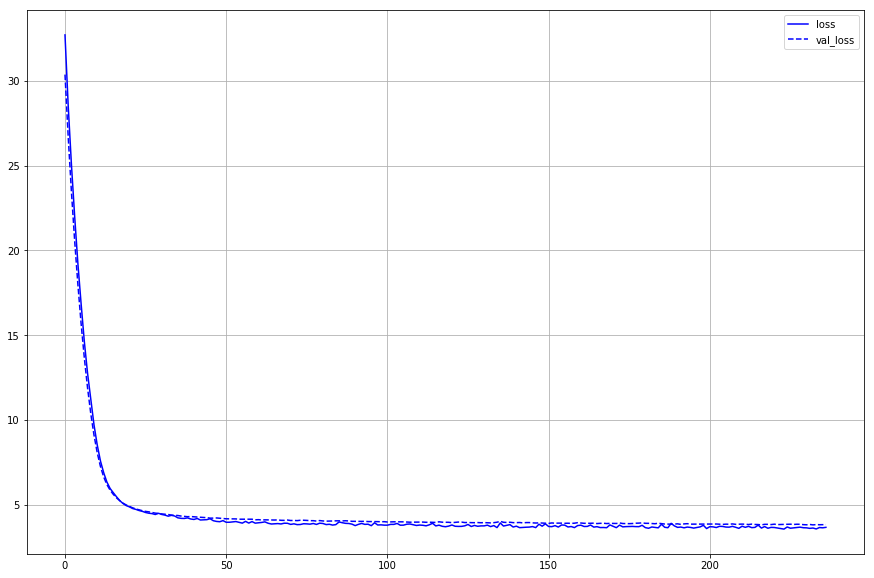

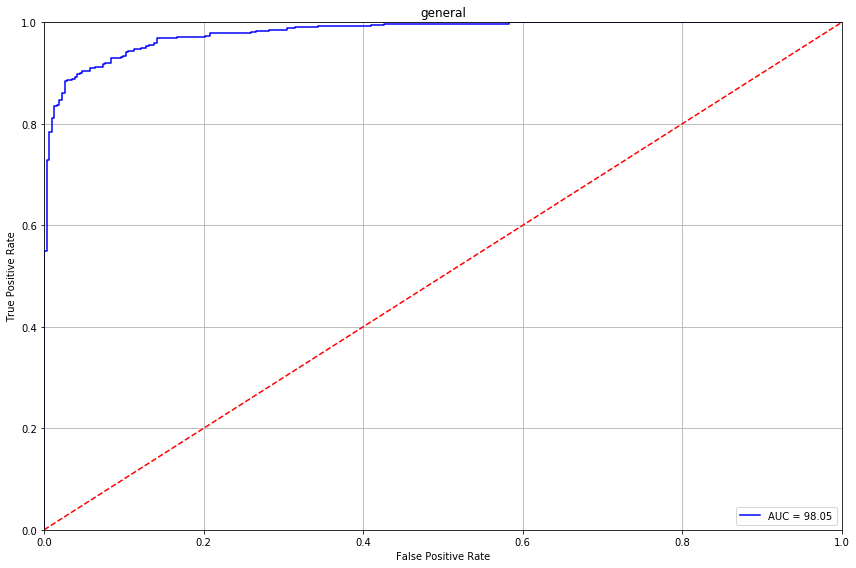

--------------------
PNAS controls result:


,S1_,S2_,S3_
count,180.000000,180.000000,180.000000
mean,0.498257,0.332206,0.123282
std,0.369650,0.254706,0.092516
min,0.006597,0.020137,0.016126
25%,0.109803,0.097831,0.045702
50%,0.477885,0.257579,0.091181
75%,0.898426,0.556075,0.185902
max,0.995163,0.882352,0.409056


In [67]:
plt.figure(figsize=(15, 10))
myplots.training_plot(h.history)
# -------------------------------
res_ = model.predict_on_batch(X_dev)
res_ = np.concatenate([np.expand_dims(r, 2) for r in res_], axis=2)
res_ = pd.DataFrame(np.mean(res_, axis=2), index=dataset_[
                    1].index, columns=['S1_', 'S2_', 'S3_'])
result = pd.concat([dataset_[1], res_], axis=1)

myplots.binroc_multiple(result, 'S1', 'S1_', 'T1', cancer_sets, normal_set[0])
plt.show()
# -------------------------------
print('-'*20)
print('PNAS controls result:')
res_ = model.predict(X_pnas)
res_ = np.concatenate([np.expand_dims(r, 2) for r in res_], axis=2)
res_pnas = pd.DataFrame(np.mean(res_, axis=2),
                        columns=['S1_', 'S2_', 'S3_'])
res_pnas.plot.kde(grid=True, figsize=(15, 10), ind=np.linspace(0, 1, 100))
plt.show()
display(res_pnas.describe())

<b>importance</b>

In [68]:
prd = model.predict_on_batch(X_dev)
dataset_base = pd.DataFrame(index=dataset_[1].index, columns=pd.MultiIndex.from_product(
    (np.arange(n_models), ['prd', 'loss'])))
for i in range(n_models):
    dataset_base[i, 'prd'] = prd[i][:, 0]
    dataset_base[i, 'loss'] = pairwise_logloss(
        dataset_[1].S1.values, prd[i][:, 0])

exp_res_ind = pd.MultiIndex.from_product(
    (dataset_[1].index, np.arange(0, 1.1, 0.1)))
exp_res_col = pd.MultiIndex.from_product((features[1], ['d', 'dloss']))
experiment_result = [pd.DataFrame(
    index=exp_res_ind, columns=exp_res_col) for _ in range(n_models)]

for i, f in enumerate(features[1]):
    for j in np.arange(0, 1.1, 0.1):
        X_tmp = copy.deepcopy(X_dev)
        d = np.abs(X_tmp[1][:, i]-j)
        X_tmp[1][:, i] = j
        prd_tmp = model.predict_on_batch(X_tmp)
        for k, _ in enumerate(experiment_result):
            experiment_result[k].loc[(slice(None), j), (f, 'd')] = d
            experiment_result[k].loc[(slice(None), j), (f, 'dloss')] = pairwise_logloss(
                dataset_[1].S1.values, prd_tmp[k][:, 0])-dataset_base[k, 'loss'].values

In [69]:
@interact
def ffff(k=np.arange(len(experiment_result))):
    pr = np.ceil(len(features[1])/2)
    plt.figure(figsize=(15, 5*pr))
    for c, f in enumerate(experiment_result[k].columns.levels[0]):
        plt.subplot(pr, 2, c+1)
        plt.plot(experiment_result[k][f, 'd'],
                 experiment_result[k][f, 'dloss'], '.')
        plt.title(ddef.loc[f, 'name'])

interactive(children=(Dropdown(description='k', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9), value=0), Output()), _…

<b>report</b>

In [70]:
report = pd.DataFrame(
    index=pd.MultiIndex.from_product((all_sets, features[1])),
    columns=pd.MultiIndex.from_product((np.arange(n_models), ['m', 'std'])))

for i in report.columns.levels[0]:
    for j in report.index.levels[1]:
        X = experiment_result[i][j]
        for k in report.index.levels[0]:
            ind = dataset_[1].loc[dataset_[1].T1 == k].index
            estim = sm.OLS(X.loc[ind, 'dloss'].values.astype(float),
                           X.loc[ind, 'd'].values.astype(float)).fit()

            report.loc[(k, j), (i, 'm')] = estim.params[0]
            report.loc[(k, j), (i, 'std')] = estim.bse[0]

report.to_excel(save_path+'report.xlsx')

In [71]:
for s in report.index.levels[0]:
    mdf = report.loc[s, (slice(None), ['m'])]
    sdf = report.loc[s, (slice(None), ['std'])]
    mdfr = mdf.rank(axis=0)
    mdfi = mdf.mean(axis=1).argsort()[::-1]
    mdf = mdf.iloc[mdfi, :]
    sdf = sdf.iloc[mdfi, :]
    mdfr = mdfr.iloc[mdfi, :]
    plt.figure(figsize=(15, 20))
    for c, i in enumerate(np.arange(0, len(mdf.index), 10)):
        ax = plt.subplot(4, 2, 2*c+1)
        mdf.iloc[i:i+10, :].T.plot(ax=ax, grid=1,
                                   yerr=sdf.iloc[i:i+10, :].values)
        plt.xticks(np.arange(10))
        plt.ylim(0, 1)
        plt.legend(ddef.loc[mdf.iloc[i:i+10, :].index, 'name'])
        if c == 0:
            plt.title('importance-{}'.format(s))
        ax = plt.subplot(4, 2, 2*c+2)
        mdfr.iloc[i:i+10, :].T.plot(ax=ax, grid=1, legend=False)
        plt.xticks(np.arange(10))
        if c == 0:
            plt.title('rank-{}'.format(s))
    plt.savefig(save_path+s, dpi=200)
    plt.close()

report_ = report.astype(float).mean(axis=0, level=1)
mdf = report_.loc[:, (slice(None), ['m'])]
sdf = report_.loc[:, (slice(None), ['std'])]
mdfr = mdf.rank(axis=0)
mdfi = mdf.mean(axis=1).argsort()[::-1]
mdf = mdf.iloc[mdfi, :]
sdf = sdf.iloc[mdfi, :]
mdfr = mdfr.iloc[mdfi, :]
plt.figure(figsize=(15, 20))
for c, i in enumerate(np.arange(0, len(mdf.index), 10)):
    ax = plt.subplot(4, 2, 2*c+1)
    mdf.iloc[i:i+10, :].T.plot(ax=ax, grid=1, yerr=sdf.iloc[i:i+10, :].values)
    plt.xticks(np.arange(10))
    plt.ylim(0, 1)
    plt.legend(ddef.loc[mdf.iloc[i:i+10, :].index, 'name'])
    if c == 0:
        plt.title('importance-all')
    ax = plt.subplot(4, 2, 2*c+2)
    mdfr.iloc[i:i+10, :].T.plot(ax=ax, grid=1, legend=False)
    plt.xticks(np.arange(10))
    if c == 0:
        plt.title('rank-all')
plt.savefig(save_path+'all', dpi=200)
plt.close()

## Level 2

In [17]:
save_path = './feature selection/Feature importance 1/Level2/'
features = [['F1', 'F2'],
            [
                'F10', 'F13', 'F14', 'F15', 'F17', 'F26', 'F28', 'F29', 'F35',
                'F39'
            ]]
features_set = np.concatenate(features)
targets = [['S1', 'S2', 'S3']]
targets_set = np.concatenate(targets)
data_set = np.concatenate([features_set, targets_set])
n_models = 10

<b>model</b>

In [20]:
dataset_ = copy.deepcopy(dataset)

for i, d in enumerate(dataset_):
    dataset_[i] = d.dropna(subset=data_set).copy()

transformer = {
    myprep.age_transformer(): ['F1'],
    skprep.OrdinalEncoder(): ['F2'],
    skprep.QuantileTransformer(): features[1]
}
transformer = myprep.PipeTransform(transformer, dataset_[0])

for i, d in enumerate(dataset_):
    dataset_[i] = transformer.transform(d)

X_train = myhandles.dataset_generator(dataset_[0], features)
X_dev = myhandles.dataset_generator(dataset_[1], features)
Y_train = myhandles.dataset_generator(dataset_[0], targets)
Y_dev = myhandles.dataset_generator(dataset_[1], targets)
X_pnas = myhandles.dataset_generator(dataset_[2], features)

/home/amir/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (759). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


In [21]:
K.clear_session()


def estimator_block(in_demo, in_prot):
    reg = 0.01
    l1 = klayers.Dense(32, activation='tanh',
                       kernel_regularizer=kregs.l1(reg))(in_demo)
    l2 = klayers.Dense(32, activation='tanh',
                       kernel_regularizer=kregs.l1(reg))(in_prot)
    l = klayers.Add()([l1, l2])
    l = klayers.Dense(16, activation='selu', kernel_initializer='lecun_normal',
                      kernel_regularizer=kregs.l1(reg))(l)
    stage_out = klayers.Dense(3, activation='sigmoid')(l)
    return stage_out


K.clear_session()
in_demo = klayers.Input(shape=(2,))
in_prot = klayers.Input(shape=(X_train[1].shape[1],))
l1 = klayers.BatchNormalization()(in_demo)
l2 = klayers.BatchNormalization()(in_prot)

outputs = [estimator_block(l1, l2) for _ in range(n_models)]

model = kmodels.Model(inputs=[in_demo, in_prot], outputs=outputs)
model.compile('adam', ['binary_crossentropy']*n_models)
es = kcalls.EarlyStopping(patience=20)

Instructions for updating:
Colocations handled automatically by placer.


In [22]:
h = model.fit(X_train, Y_train*n_models, batch_size=32, epochs=1000,
              validation_data=(X_dev, Y_dev*n_models), callbacks=[es], verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 759 samples, validate on 740 samples
Epoch 1/1000
 - 21s - loss: 20.9586 - dense_4_loss: 0.6489 - dense_8_loss: 0.6335 - dense_12_loss: 0.6829 - dense_16_loss: 0.6942 - dense_20_loss: 0.7196 - dense_24_loss: 0.6954 - dense_28_loss: 0.5588 - dense_32_loss: 0.7091 - dense_36_loss: 0.7047 - dense_40_loss: 0.6659 - val_loss: 19.5812 - val_dense_4_loss: 0.5639 - val_dense_8_loss: 0.5743 - val_dense_12_loss: 0.6137 - val_dense_16_loss: 0.6048 - val_dense_20_loss: 0.6235 - val_dense_24_loss: 0.6334 - val_dense_28_loss: 0.5210 - val_dense_32_loss: 0.6111 - val_dense_36_loss: 0.6090 - val_dense_40_loss: 0.6031
Epoch 2/1000
 - 1s - loss: 18.5559 - dense_4_loss: 0.5304 - dense_8_loss: 0.5310 - dense_12_loss: 0.5579 - dense_16_loss: 0.5560 - dense_20_loss: 0.5692 - dense_24_loss: 0.5794 - dense_28_loss: 0.4832 - dense_32_loss: 0.5752 - dense_36_loss: 0.5690 - dense_40_loss: 0.5577 - val_loss: 17.5588 - val_dense_4_loss: 0.4893 - val_dense_8_

Epoch 15/1000
 - 1s - loss: 6.3846 - dense_4_loss: 0.4071 - dense_8_loss: 0.4056 - dense_12_loss: 0.4073 - dense_16_loss: 0.4123 - dense_20_loss: 0.4120 - dense_24_loss: 0.4138 - dense_28_loss: 0.4036 - dense_32_loss: 0.4144 - dense_36_loss: 0.4083 - dense_40_loss: 0.4078 - val_loss: 6.1881 - val_dense_4_loss: 0.4069 - val_dense_8_loss: 0.4019 - val_dense_12_loss: 0.4041 - val_dense_16_loss: 0.4105 - val_dense_20_loss: 0.4099 - val_dense_24_loss: 0.4099 - val_dense_28_loss: 0.4007 - val_dense_32_loss: 0.4091 - val_dense_36_loss: 0.4101 - val_dense_40_loss: 0.4050
Epoch 16/1000
 - 0s - loss: 6.0582 - dense_4_loss: 0.4065 - dense_8_loss: 0.4049 - dense_12_loss: 0.4069 - dense_16_loss: 0.4109 - dense_20_loss: 0.4119 - dense_24_loss: 0.4125 - dense_28_loss: 0.4035 - dense_32_loss: 0.4133 - dense_36_loss: 0.4073 - dense_40_loss: 0.4077 - val_loss: 5.9035 - val_dense_4_loss: 0.4074 - val_dense_8_loss: 0.4023 - val_dense_12_loss: 0.4054 - val_dense_16_loss: 0.4106 - val_dense_20_loss: 0.4109 

Epoch 30/1000
 - 0s - loss: 4.7200 - dense_4_loss: 0.3927 - dense_8_loss: 0.3879 - dense_12_loss: 0.3866 - dense_16_loss: 0.3928 - dense_20_loss: 0.3954 - dense_24_loss: 0.3944 - dense_28_loss: 0.3920 - dense_32_loss: 0.3942 - dense_36_loss: 0.3919 - dense_40_loss: 0.3934 - val_loss: 4.7354 - val_dense_4_loss: 0.3965 - val_dense_8_loss: 0.3899 - val_dense_12_loss: 0.3911 - val_dense_16_loss: 0.3944 - val_dense_20_loss: 0.3962 - val_dense_24_loss: 0.3969 - val_dense_28_loss: 0.3936 - val_dense_32_loss: 0.3954 - val_dense_36_loss: 0.3940 - val_dense_40_loss: 0.3960
Epoch 31/1000
 - 0s - loss: 4.6689 - dense_4_loss: 0.3892 - dense_8_loss: 0.3837 - dense_12_loss: 0.3828 - dense_16_loss: 0.3885 - dense_20_loss: 0.3909 - dense_24_loss: 0.3906 - dense_28_loss: 0.3879 - dense_32_loss: 0.3903 - dense_36_loss: 0.3873 - dense_40_loss: 0.3900 - val_loss: 4.7180 - val_dense_4_loss: 0.3960 - val_dense_8_loss: 0.3891 - val_dense_12_loss: 0.3903 - val_dense_16_loss: 0.3934 - val_dense_20_loss: 0.3946 

Epoch 45/1000
 - 0s - loss: 4.4436 - dense_4_loss: 0.3839 - dense_8_loss: 0.3792 - dense_12_loss: 0.3778 - dense_16_loss: 0.3819 - dense_20_loss: 0.3829 - dense_24_loss: 0.3839 - dense_28_loss: 0.3835 - dense_32_loss: 0.3849 - dense_36_loss: 0.3815 - dense_40_loss: 0.3837 - val_loss: 4.4918 - val_dense_4_loss: 0.3898 - val_dense_8_loss: 0.3850 - val_dense_12_loss: 0.3849 - val_dense_16_loss: 0.3866 - val_dense_20_loss: 0.3874 - val_dense_24_loss: 0.3889 - val_dense_28_loss: 0.3886 - val_dense_32_loss: 0.3894 - val_dense_36_loss: 0.3870 - val_dense_40_loss: 0.3884
Epoch 46/1000
 - 0s - loss: 4.5067 - dense_4_loss: 0.3914 - dense_8_loss: 0.3869 - dense_12_loss: 0.3846 - dense_16_loss: 0.3888 - dense_20_loss: 0.3894 - dense_24_loss: 0.3916 - dense_28_loss: 0.3914 - dense_32_loss: 0.3922 - dense_36_loss: 0.3882 - dense_40_loss: 0.3908 - val_loss: 4.4851 - val_dense_4_loss: 0.3899 - val_dense_8_loss: 0.3853 - val_dense_12_loss: 0.3851 - val_dense_16_loss: 0.3867 - val_dense_20_loss: 0.3876 

Epoch 60/1000
 - 0s - loss: 4.3506 - dense_4_loss: 0.3824 - dense_8_loss: 0.3808 - dense_12_loss: 0.3779 - dense_16_loss: 0.3816 - dense_20_loss: 0.3836 - dense_24_loss: 0.3839 - dense_28_loss: 0.3839 - dense_32_loss: 0.3854 - dense_36_loss: 0.3821 - dense_40_loss: 0.3840 - val_loss: 4.3682 - val_dense_4_loss: 0.3843 - val_dense_8_loss: 0.3833 - val_dense_12_loss: 0.3824 - val_dense_16_loss: 0.3832 - val_dense_20_loss: 0.3850 - val_dense_24_loss: 0.3841 - val_dense_28_loss: 0.3848 - val_dense_32_loss: 0.3851 - val_dense_36_loss: 0.3839 - val_dense_40_loss: 0.3847
Epoch 61/1000
 - 0s - loss: 4.3499 - dense_4_loss: 0.3826 - dense_8_loss: 0.3820 - dense_12_loss: 0.3789 - dense_16_loss: 0.3820 - dense_20_loss: 0.3843 - dense_24_loss: 0.3829 - dense_28_loss: 0.3834 - dense_32_loss: 0.3851 - dense_36_loss: 0.3826 - dense_40_loss: 0.3836 - val_loss: 4.3597 - val_dense_4_loss: 0.3842 - val_dense_8_loss: 0.3832 - val_dense_12_loss: 0.3825 - val_dense_16_loss: 0.3831 - val_dense_20_loss: 0.3847 

Epoch 75/1000
 - 0s - loss: 4.1782 - dense_4_loss: 0.3684 - dense_8_loss: 0.3690 - dense_12_loss: 0.3664 - dense_16_loss: 0.3686 - dense_20_loss: 0.3708 - dense_24_loss: 0.3699 - dense_28_loss: 0.3705 - dense_32_loss: 0.3720 - dense_36_loss: 0.3690 - dense_40_loss: 0.3712 - val_loss: 4.3007 - val_dense_4_loss: 0.3812 - val_dense_8_loss: 0.3822 - val_dense_12_loss: 0.3812 - val_dense_16_loss: 0.3809 - val_dense_20_loss: 0.3838 - val_dense_24_loss: 0.3799 - val_dense_28_loss: 0.3813 - val_dense_32_loss: 0.3831 - val_dense_36_loss: 0.3821 - val_dense_40_loss: 0.3822
Epoch 76/1000
 - 0s - loss: 4.2980 - dense_4_loss: 0.3806 - dense_8_loss: 0.3819 - dense_12_loss: 0.3793 - dense_16_loss: 0.3812 - dense_20_loss: 0.3838 - dense_24_loss: 0.3811 - dense_28_loss: 0.3824 - dense_32_loss: 0.3844 - dense_36_loss: 0.3822 - dense_40_loss: 0.3832 - val_loss: 4.3002 - val_dense_4_loss: 0.3813 - val_dense_8_loss: 0.3824 - val_dense_12_loss: 0.3813 - val_dense_16_loss: 0.3811 - val_dense_20_loss: 0.3840 

Epoch 90/1000
 - 0s - loss: 4.2084 - dense_4_loss: 0.3749 - dense_8_loss: 0.3759 - dense_12_loss: 0.3732 - dense_16_loss: 0.3744 - dense_20_loss: 0.3774 - dense_24_loss: 0.3761 - dense_28_loss: 0.3764 - dense_32_loss: 0.3786 - dense_36_loss: 0.3754 - dense_40_loss: 0.3775 - val_loss: 4.2662 - val_dense_4_loss: 0.3805 - val_dense_8_loss: 0.3824 - val_dense_12_loss: 0.3807 - val_dense_16_loss: 0.3809 - val_dense_20_loss: 0.3840 - val_dense_24_loss: 0.3792 - val_dense_28_loss: 0.3803 - val_dense_32_loss: 0.3833 - val_dense_36_loss: 0.3820 - val_dense_40_loss: 0.3813
Epoch 91/1000
 - 0s - loss: 4.2272 - dense_4_loss: 0.3761 - dense_8_loss: 0.3782 - dense_12_loss: 0.3755 - dense_16_loss: 0.3767 - dense_20_loss: 0.3799 - dense_24_loss: 0.3774 - dense_28_loss: 0.3781 - dense_32_loss: 0.3806 - dense_36_loss: 0.3779 - dense_40_loss: 0.3789 - val_loss: 4.2596 - val_dense_4_loss: 0.3806 - val_dense_8_loss: 0.3825 - val_dense_12_loss: 0.3810 - val_dense_16_loss: 0.3812 - val_dense_20_loss: 0.3839 

Epoch 105/1000
 - 0s - loss: 4.1436 - dense_4_loss: 0.3707 - dense_8_loss: 0.3732 - dense_12_loss: 0.3705 - dense_16_loss: 0.3722 - dense_20_loss: 0.3746 - dense_24_loss: 0.3714 - dense_28_loss: 0.3725 - dense_32_loss: 0.3752 - dense_36_loss: 0.3726 - dense_40_loss: 0.3736 - val_loss: 4.2189 - val_dense_4_loss: 0.3796 - val_dense_8_loss: 0.3816 - val_dense_12_loss: 0.3800 - val_dense_16_loss: 0.3806 - val_dense_20_loss: 0.3828 - val_dense_24_loss: 0.3784 - val_dense_28_loss: 0.3794 - val_dense_32_loss: 0.3825 - val_dense_36_loss: 0.3811 - val_dense_40_loss: 0.3806
Epoch 106/1000
 - 0s - loss: 4.1896 - dense_4_loss: 0.3761 - dense_8_loss: 0.3781 - dense_12_loss: 0.3760 - dense_16_loss: 0.3777 - dense_20_loss: 0.3796 - dense_24_loss: 0.3776 - dense_28_loss: 0.3779 - dense_32_loss: 0.3799 - dense_36_loss: 0.3780 - dense_40_loss: 0.3786 - val_loss: 4.2158 - val_dense_4_loss: 0.3797 - val_dense_8_loss: 0.3816 - val_dense_12_loss: 0.3799 - val_dense_16_loss: 0.3806 - val_dense_20_loss: 0.383

Epoch 120/1000
 - 0s - loss: 4.1441 - dense_4_loss: 0.3721 - dense_8_loss: 0.3749 - dense_12_loss: 0.3731 - dense_16_loss: 0.3738 - dense_20_loss: 0.3766 - dense_24_loss: 0.3740 - dense_28_loss: 0.3741 - dense_32_loss: 0.3767 - dense_36_loss: 0.3747 - dense_40_loss: 0.3757 - val_loss: 4.1900 - val_dense_4_loss: 0.3785 - val_dense_8_loss: 0.3807 - val_dense_12_loss: 0.3791 - val_dense_16_loss: 0.3792 - val_dense_20_loss: 0.3819 - val_dense_24_loss: 0.3768 - val_dense_28_loss: 0.3785 - val_dense_32_loss: 0.3813 - val_dense_36_loss: 0.3800 - val_dense_40_loss: 0.3795
Epoch 121/1000
 - 0s - loss: 4.2229 - dense_4_loss: 0.3813 - dense_8_loss: 0.3825 - dense_12_loss: 0.3812 - dense_16_loss: 0.3813 - dense_20_loss: 0.3845 - dense_24_loss: 0.3832 - dense_28_loss: 0.3824 - dense_32_loss: 0.3850 - dense_36_loss: 0.3829 - dense_40_loss: 0.3849 - val_loss: 4.1977 - val_dense_4_loss: 0.3792 - val_dense_8_loss: 0.3814 - val_dense_12_loss: 0.3798 - val_dense_16_loss: 0.3797 - val_dense_20_loss: 0.382

Epoch 135/1000
 - 0s - loss: 4.0863 - dense_4_loss: 0.3692 - dense_8_loss: 0.3716 - dense_12_loss: 0.3700 - dense_16_loss: 0.3697 - dense_20_loss: 0.3733 - dense_24_loss: 0.3705 - dense_28_loss: 0.3706 - dense_32_loss: 0.3736 - dense_36_loss: 0.3712 - dense_40_loss: 0.3733 - val_loss: 4.1626 - val_dense_4_loss: 0.3779 - val_dense_8_loss: 0.3800 - val_dense_12_loss: 0.3785 - val_dense_16_loss: 0.3784 - val_dense_20_loss: 0.3811 - val_dense_24_loss: 0.3761 - val_dense_28_loss: 0.3779 - val_dense_32_loss: 0.3807 - val_dense_36_loss: 0.3797 - val_dense_40_loss: 0.3784
Epoch 136/1000
 - 0s - loss: 4.0629 - dense_4_loss: 0.3667 - dense_8_loss: 0.3692 - dense_12_loss: 0.3679 - dense_16_loss: 0.3672 - dense_20_loss: 0.3711 - dense_24_loss: 0.3684 - dense_28_loss: 0.3681 - dense_32_loss: 0.3715 - dense_36_loss: 0.3690 - dense_40_loss: 0.3709 - val_loss: 4.1626 - val_dense_4_loss: 0.3781 - val_dense_8_loss: 0.3801 - val_dense_12_loss: 0.3786 - val_dense_16_loss: 0.3784 - val_dense_20_loss: 0.381

Epoch 150/1000
 - 0s - loss: 4.0832 - dense_4_loss: 0.3709 - dense_8_loss: 0.3734 - dense_12_loss: 0.3725 - dense_16_loss: 0.3719 - dense_20_loss: 0.3750 - dense_24_loss: 0.3721 - dense_28_loss: 0.3725 - dense_32_loss: 0.3753 - dense_36_loss: 0.3734 - dense_40_loss: 0.3750 - val_loss: 4.1493 - val_dense_4_loss: 0.3784 - val_dense_8_loss: 0.3802 - val_dense_12_loss: 0.3790 - val_dense_16_loss: 0.3786 - val_dense_20_loss: 0.3815 - val_dense_24_loss: 0.3768 - val_dense_28_loss: 0.3784 - val_dense_32_loss: 0.3812 - val_dense_36_loss: 0.3802 - val_dense_40_loss: 0.3793
Epoch 151/1000
 - 0s - loss: 4.1209 - dense_4_loss: 0.3741 - dense_8_loss: 0.3764 - dense_12_loss: 0.3762 - dense_16_loss: 0.3752 - dense_20_loss: 0.3781 - dense_24_loss: 0.3753 - dense_28_loss: 0.3755 - dense_32_loss: 0.3789 - dense_36_loss: 0.3769 - dense_40_loss: 0.3792 - val_loss: 4.1494 - val_dense_4_loss: 0.3782 - val_dense_8_loss: 0.3799 - val_dense_12_loss: 0.3789 - val_dense_16_loss: 0.3783 - val_dense_20_loss: 0.381

Epoch 165/1000
 - 0s - loss: 4.1468 - dense_4_loss: 0.3788 - dense_8_loss: 0.3816 - dense_12_loss: 0.3806 - dense_16_loss: 0.3795 - dense_20_loss: 0.3835 - dense_24_loss: 0.3800 - dense_28_loss: 0.3804 - dense_32_loss: 0.3837 - dense_36_loss: 0.3817 - dense_40_loss: 0.3827 - val_loss: 4.1230 - val_dense_4_loss: 0.3784 - val_dense_8_loss: 0.3794 - val_dense_12_loss: 0.3783 - val_dense_16_loss: 0.3777 - val_dense_20_loss: 0.3808 - val_dense_24_loss: 0.3769 - val_dense_28_loss: 0.3781 - val_dense_32_loss: 0.3806 - val_dense_36_loss: 0.3795 - val_dense_40_loss: 0.3789
Epoch 166/1000
 - 0s - loss: 4.1147 - dense_4_loss: 0.3753 - dense_8_loss: 0.3781 - dense_12_loss: 0.3768 - dense_16_loss: 0.3760 - dense_20_loss: 0.3799 - dense_24_loss: 0.3767 - dense_28_loss: 0.3773 - dense_32_loss: 0.3797 - dense_36_loss: 0.3774 - dense_40_loss: 0.3787 - val_loss: 4.1277 - val_dense_4_loss: 0.3786 - val_dense_8_loss: 0.3797 - val_dense_12_loss: 0.3785 - val_dense_16_loss: 0.3778 - val_dense_20_loss: 0.381

Epoch 180/1000
 - 0s - loss: 3.9836 - dense_4_loss: 0.3631 - dense_8_loss: 0.3654 - dense_12_loss: 0.3645 - dense_16_loss: 0.3635 - dense_20_loss: 0.3674 - dense_24_loss: 0.3646 - dense_28_loss: 0.3646 - dense_32_loss: 0.3678 - dense_36_loss: 0.3658 - dense_40_loss: 0.3678 - val_loss: 4.1043 - val_dense_4_loss: 0.3777 - val_dense_8_loss: 0.3786 - val_dense_12_loss: 0.3774 - val_dense_16_loss: 0.3767 - val_dense_20_loss: 0.3801 - val_dense_24_loss: 0.3764 - val_dense_28_loss: 0.3775 - val_dense_32_loss: 0.3799 - val_dense_36_loss: 0.3789 - val_dense_40_loss: 0.3783
Epoch 181/1000
 - 0s - loss: 4.0544 - dense_4_loss: 0.3705 - dense_8_loss: 0.3728 - dense_12_loss: 0.3721 - dense_16_loss: 0.3712 - dense_20_loss: 0.3747 - dense_24_loss: 0.3722 - dense_28_loss: 0.3721 - dense_32_loss: 0.3752 - dense_36_loss: 0.3734 - dense_40_loss: 0.3751 - val_loss: 4.1123 - val_dense_4_loss: 0.3780 - val_dense_8_loss: 0.3790 - val_dense_12_loss: 0.3778 - val_dense_16_loss: 0.3772 - val_dense_20_loss: 0.380

Epoch 195/1000
 - 0s - loss: 4.0089 - dense_4_loss: 0.3666 - dense_8_loss: 0.3690 - dense_12_loss: 0.3681 - dense_16_loss: 0.3671 - dense_20_loss: 0.3708 - dense_24_loss: 0.3678 - dense_28_loss: 0.3681 - dense_32_loss: 0.3711 - dense_36_loss: 0.3690 - dense_40_loss: 0.3707 - val_loss: 4.1031 - val_dense_4_loss: 0.3779 - val_dense_8_loss: 0.3789 - val_dense_12_loss: 0.3777 - val_dense_16_loss: 0.3773 - val_dense_20_loss: 0.3803 - val_dense_24_loss: 0.3770 - val_dense_28_loss: 0.3778 - val_dense_32_loss: 0.3803 - val_dense_36_loss: 0.3798 - val_dense_40_loss: 0.3793
Epoch 196/1000
 - 0s - loss: 4.0809 - dense_4_loss: 0.3749 - dense_8_loss: 0.3768 - dense_12_loss: 0.3758 - dense_16_loss: 0.3748 - dense_20_loss: 0.3788 - dense_24_loss: 0.3756 - dense_28_loss: 0.3759 - dense_32_loss: 0.3790 - dense_36_loss: 0.3774 - dense_40_loss: 0.3780 - val_loss: 4.0941 - val_dense_4_loss: 0.3776 - val_dense_8_loss: 0.3787 - val_dense_12_loss: 0.3775 - val_dense_16_loss: 0.3769 - val_dense_20_loss: 0.380

Epoch 210/1000
 - 0s - loss: 3.9790 - dense_4_loss: 0.3660 - dense_8_loss: 0.3676 - dense_12_loss: 0.3669 - dense_16_loss: 0.3660 - dense_20_loss: 0.3694 - dense_24_loss: 0.3664 - dense_28_loss: 0.3666 - dense_32_loss: 0.3693 - dense_36_loss: 0.3677 - dense_40_loss: 0.3686 - val_loss: 4.0862 - val_dense_4_loss: 0.3780 - val_dense_8_loss: 0.3787 - val_dense_12_loss: 0.3774 - val_dense_16_loss: 0.3767 - val_dense_20_loss: 0.3802 - val_dense_24_loss: 0.3770 - val_dense_28_loss: 0.3774 - val_dense_32_loss: 0.3798 - val_dense_36_loss: 0.3791 - val_dense_40_loss: 0.3785
Epoch 211/1000
 - 0s - loss: 4.0404 - dense_4_loss: 0.3716 - dense_8_loss: 0.3739 - dense_12_loss: 0.3731 - dense_16_loss: 0.3721 - dense_20_loss: 0.3756 - dense_24_loss: 0.3728 - dense_28_loss: 0.3729 - dense_32_loss: 0.3758 - dense_36_loss: 0.3742 - dense_40_loss: 0.3748 - val_loss: 4.0927 - val_dense_4_loss: 0.3782 - val_dense_8_loss: 0.3791 - val_dense_12_loss: 0.3779 - val_dense_16_loss: 0.3770 - val_dense_20_loss: 0.380

Epoch 225/1000
 - 0s - loss: 3.9870 - dense_4_loss: 0.3676 - dense_8_loss: 0.3692 - dense_12_loss: 0.3684 - dense_16_loss: 0.3670 - dense_20_loss: 0.3712 - dense_24_loss: 0.3685 - dense_28_loss: 0.3678 - dense_32_loss: 0.3717 - dense_36_loss: 0.3697 - dense_40_loss: 0.3706 - val_loss: 4.0852 - val_dense_4_loss: 0.3782 - val_dense_8_loss: 0.3792 - val_dense_12_loss: 0.3780 - val_dense_16_loss: 0.3770 - val_dense_20_loss: 0.3809 - val_dense_24_loss: 0.3783 - val_dense_28_loss: 0.3778 - val_dense_32_loss: 0.3806 - val_dense_36_loss: 0.3798 - val_dense_40_loss: 0.3794
Epoch 226/1000
 - 0s - loss: 3.9757 - dense_4_loss: 0.3661 - dense_8_loss: 0.3681 - dense_12_loss: 0.3672 - dense_16_loss: 0.3661 - dense_20_loss: 0.3698 - dense_24_loss: 0.3675 - dense_28_loss: 0.3670 - dense_32_loss: 0.3702 - dense_36_loss: 0.3682 - dense_40_loss: 0.3695 - val_loss: 4.0697 - val_dense_4_loss: 0.3769 - val_dense_8_loss: 0.3778 - val_dense_12_loss: 0.3765 - val_dense_16_loss: 0.3757 - val_dense_20_loss: 0.379

Epoch 240/1000
 - 0s - loss: 4.0212 - dense_4_loss: 0.3716 - dense_8_loss: 0.3736 - dense_12_loss: 0.3729 - dense_16_loss: 0.3714 - dense_20_loss: 0.3756 - dense_24_loss: 0.3731 - dense_28_loss: 0.3721 - dense_32_loss: 0.3761 - dense_36_loss: 0.3743 - dense_40_loss: 0.3749 - val_loss: 4.0769 - val_dense_4_loss: 0.3781 - val_dense_8_loss: 0.3787 - val_dense_12_loss: 0.3775 - val_dense_16_loss: 0.3766 - val_dense_20_loss: 0.3807 - val_dense_24_loss: 0.3788 - val_dense_28_loss: 0.3776 - val_dense_32_loss: 0.3805 - val_dense_36_loss: 0.3797 - val_dense_40_loss: 0.3788
Epoch 241/1000
 - 0s - loss: 4.0076 - dense_4_loss: 0.3699 - dense_8_loss: 0.3720 - dense_12_loss: 0.3713 - dense_16_loss: 0.3703 - dense_20_loss: 0.3737 - dense_24_loss: 0.3719 - dense_28_loss: 0.3710 - dense_32_loss: 0.3739 - dense_36_loss: 0.3725 - dense_40_loss: 0.3728 - val_loss: 4.0604 - val_dense_4_loss: 0.3767 - val_dense_8_loss: 0.3772 - val_dense_12_loss: 0.3759 - val_dense_16_loss: 0.3751 - val_dense_20_loss: 0.379

Epoch 255/1000
 - 1s - loss: 4.0108 - dense_4_loss: 0.3711 - dense_8_loss: 0.3729 - dense_12_loss: 0.3721 - dense_16_loss: 0.3708 - dense_20_loss: 0.3750 - dense_24_loss: 0.3729 - dense_28_loss: 0.3715 - dense_32_loss: 0.3754 - dense_36_loss: 0.3740 - dense_40_loss: 0.3739 - val_loss: 4.0558 - val_dense_4_loss: 0.3770 - val_dense_8_loss: 0.3776 - val_dense_12_loss: 0.3763 - val_dense_16_loss: 0.3752 - val_dense_20_loss: 0.3795 - val_dense_24_loss: 0.3784 - val_dense_28_loss: 0.3762 - val_dense_32_loss: 0.3792 - val_dense_36_loss: 0.3785 - val_dense_40_loss: 0.3774
Epoch 256/1000
 - 0s - loss: 4.0117 - dense_4_loss: 0.3714 - dense_8_loss: 0.3732 - dense_12_loss: 0.3726 - dense_16_loss: 0.3715 - dense_20_loss: 0.3751 - dense_24_loss: 0.3737 - dense_28_loss: 0.3723 - dense_32_loss: 0.3750 - dense_36_loss: 0.3736 - dense_40_loss: 0.3738 - val_loss: 4.0509 - val_dense_4_loss: 0.3766 - val_dense_8_loss: 0.3770 - val_dense_12_loss: 0.3757 - val_dense_16_loss: 0.3748 - val_dense_20_loss: 0.379

Epoch 270/1000
 - 0s - loss: 3.9555 - dense_4_loss: 0.3661 - dense_8_loss: 0.3676 - dense_12_loss: 0.3665 - dense_16_loss: 0.3653 - dense_20_loss: 0.3698 - dense_24_loss: 0.3678 - dense_28_loss: 0.3664 - dense_32_loss: 0.3701 - dense_36_loss: 0.3682 - dense_40_loss: 0.3684 - val_loss: 4.0496 - val_dense_4_loss: 0.3764 - val_dense_8_loss: 0.3767 - val_dense_12_loss: 0.3756 - val_dense_16_loss: 0.3746 - val_dense_20_loss: 0.3787 - val_dense_24_loss: 0.3781 - val_dense_28_loss: 0.3755 - val_dense_32_loss: 0.3788 - val_dense_36_loss: 0.3779 - val_dense_40_loss: 0.3771
Epoch 271/1000
 - 0s - loss: 4.0463 - dense_4_loss: 0.3755 - dense_8_loss: 0.3767 - dense_12_loss: 0.3759 - dense_16_loss: 0.3744 - dense_20_loss: 0.3790 - dense_24_loss: 0.3771 - dense_28_loss: 0.3755 - dense_32_loss: 0.3792 - dense_36_loss: 0.3774 - dense_40_loss: 0.3776 - val_loss: 4.0498 - val_dense_4_loss: 0.3768 - val_dense_8_loss: 0.3772 - val_dense_12_loss: 0.3760 - val_dense_16_loss: 0.3748 - val_dense_20_loss: 0.379

Epoch 285/1000
 - 0s - loss: 4.0130 - dense_4_loss: 0.3732 - dense_8_loss: 0.3743 - dense_12_loss: 0.3736 - dense_16_loss: 0.3724 - dense_20_loss: 0.3765 - dense_24_loss: 0.3747 - dense_28_loss: 0.3732 - dense_32_loss: 0.3766 - dense_36_loss: 0.3750 - dense_40_loss: 0.3750 - val_loss: 4.0351 - val_dense_4_loss: 0.3763 - val_dense_8_loss: 0.3764 - val_dense_12_loss: 0.3752 - val_dense_16_loss: 0.3742 - val_dense_20_loss: 0.3786 - val_dense_24_loss: 0.3776 - val_dense_28_loss: 0.3751 - val_dense_32_loss: 0.3785 - val_dense_36_loss: 0.3776 - val_dense_40_loss: 0.3766
Epoch 286/1000
 - 0s - loss: 4.0479 - dense_4_loss: 0.3765 - dense_8_loss: 0.3779 - dense_12_loss: 0.3770 - dense_16_loss: 0.3757 - dense_20_loss: 0.3799 - dense_24_loss: 0.3781 - dense_28_loss: 0.3765 - dense_32_loss: 0.3798 - dense_36_loss: 0.3781 - dense_40_loss: 0.3780 - val_loss: 4.0459 - val_dense_4_loss: 0.3770 - val_dense_8_loss: 0.3772 - val_dense_12_loss: 0.3762 - val_dense_16_loss: 0.3749 - val_dense_20_loss: 0.379

Epoch 300/1000
 - 0s - loss: 3.9413 - dense_4_loss: 0.3665 - dense_8_loss: 0.3673 - dense_12_loss: 0.3665 - dense_16_loss: 0.3651 - dense_20_loss: 0.3699 - dense_24_loss: 0.3674 - dense_28_loss: 0.3660 - dense_32_loss: 0.3696 - dense_36_loss: 0.3676 - dense_40_loss: 0.3676 - val_loss: 4.0374 - val_dense_4_loss: 0.3768 - val_dense_8_loss: 0.3770 - val_dense_12_loss: 0.3756 - val_dense_16_loss: 0.3746 - val_dense_20_loss: 0.3794 - val_dense_24_loss: 0.3781 - val_dense_28_loss: 0.3756 - val_dense_32_loss: 0.3790 - val_dense_36_loss: 0.3780 - val_dense_40_loss: 0.3769
Epoch 301/1000
 - 0s - loss: 4.0089 - dense_4_loss: 0.3734 - dense_8_loss: 0.3740 - dense_12_loss: 0.3732 - dense_16_loss: 0.3722 - dense_20_loss: 0.3758 - dense_24_loss: 0.3745 - dense_28_loss: 0.3731 - dense_32_loss: 0.3762 - dense_36_loss: 0.3748 - dense_40_loss: 0.3747 - val_loss: 4.0298 - val_dense_4_loss: 0.3758 - val_dense_8_loss: 0.3759 - val_dense_12_loss: 0.3746 - val_dense_16_loss: 0.3736 - val_dense_20_loss: 0.378

Epoch 315/1000
 - 0s - loss: 3.9585 - dense_4_loss: 0.3697 - dense_8_loss: 0.3696 - dense_12_loss: 0.3690 - dense_16_loss: 0.3678 - dense_20_loss: 0.3718 - dense_24_loss: 0.3701 - dense_28_loss: 0.3687 - dense_32_loss: 0.3716 - dense_36_loss: 0.3705 - dense_40_loss: 0.3699 - val_loss: 4.0178 - val_dense_4_loss: 0.3755 - val_dense_8_loss: 0.3754 - val_dense_12_loss: 0.3744 - val_dense_16_loss: 0.3730 - val_dense_20_loss: 0.3778 - val_dense_24_loss: 0.3769 - val_dense_28_loss: 0.3741 - val_dense_32_loss: 0.3779 - val_dense_36_loss: 0.3768 - val_dense_40_loss: 0.3758
Epoch 316/1000
 - 0s - loss: 4.1114 - dense_4_loss: 0.3845 - dense_8_loss: 0.3847 - dense_12_loss: 0.3840 - dense_16_loss: 0.3822 - dense_20_loss: 0.3874 - dense_24_loss: 0.3855 - dense_28_loss: 0.3834 - dense_32_loss: 0.3878 - dense_36_loss: 0.3858 - dense_40_loss: 0.3859 - val_loss: 4.0232 - val_dense_4_loss: 0.3762 - val_dense_8_loss: 0.3760 - val_dense_12_loss: 0.3750 - val_dense_16_loss: 0.3736 - val_dense_20_loss: 0.378

Epoch 330/1000
 - 1s - loss: 4.0967 - dense_4_loss: 0.3833 - dense_8_loss: 0.3833 - dense_12_loss: 0.3827 - dense_16_loss: 0.3816 - dense_20_loss: 0.3854 - dense_24_loss: 0.3836 - dense_28_loss: 0.3825 - dense_32_loss: 0.3855 - dense_36_loss: 0.3843 - dense_40_loss: 0.3839 - val_loss: 4.0091 - val_dense_4_loss: 0.3749 - val_dense_8_loss: 0.3746 - val_dense_12_loss: 0.3736 - val_dense_16_loss: 0.3722 - val_dense_20_loss: 0.3771 - val_dense_24_loss: 0.3760 - val_dense_28_loss: 0.3733 - val_dense_32_loss: 0.3772 - val_dense_36_loss: 0.3760 - val_dense_40_loss: 0.3751
Epoch 331/1000
 - 1s - loss: 4.0292 - dense_4_loss: 0.3767 - dense_8_loss: 0.3769 - dense_12_loss: 0.3760 - dense_16_loss: 0.3747 - dense_20_loss: 0.3793 - dense_24_loss: 0.3772 - dense_28_loss: 0.3756 - dense_32_loss: 0.3797 - dense_36_loss: 0.3776 - dense_40_loss: 0.3778 - val_loss: 4.0232 - val_dense_4_loss: 0.3766 - val_dense_8_loss: 0.3764 - val_dense_12_loss: 0.3753 - val_dense_16_loss: 0.3739 - val_dense_20_loss: 0.378

Epoch 345/1000
 - 0s - loss: 4.0586 - dense_4_loss: 0.3797 - dense_8_loss: 0.3797 - dense_12_loss: 0.3792 - dense_16_loss: 0.3778 - dense_20_loss: 0.3821 - dense_24_loss: 0.3806 - dense_28_loss: 0.3787 - dense_32_loss: 0.3819 - dense_36_loss: 0.3809 - dense_40_loss: 0.3804 - val_loss: 4.0137 - val_dense_4_loss: 0.3752 - val_dense_8_loss: 0.3752 - val_dense_12_loss: 0.3740 - val_dense_16_loss: 0.3725 - val_dense_20_loss: 0.3783 - val_dense_24_loss: 0.3763 - val_dense_28_loss: 0.3737 - val_dense_32_loss: 0.3778 - val_dense_36_loss: 0.3762 - val_dense_40_loss: 0.3751
Epoch 346/1000
 - 0s - loss: 3.9489 - dense_4_loss: 0.3688 - dense_8_loss: 0.3689 - dense_12_loss: 0.3683 - dense_16_loss: 0.3667 - dense_20_loss: 0.3716 - dense_24_loss: 0.3696 - dense_28_loss: 0.3678 - dense_32_loss: 0.3719 - dense_36_loss: 0.3699 - dense_40_loss: 0.3697 - val_loss: 4.0114 - val_dense_4_loss: 0.3756 - val_dense_8_loss: 0.3754 - val_dense_12_loss: 0.3743 - val_dense_16_loss: 0.3728 - val_dense_20_loss: 0.378

Epoch 360/1000
 - 1s - loss: 3.8745 - dense_4_loss: 0.3617 - dense_8_loss: 0.3616 - dense_12_loss: 0.3608 - dense_16_loss: 0.3598 - dense_20_loss: 0.3637 - dense_24_loss: 0.3620 - dense_28_loss: 0.3606 - dense_32_loss: 0.3642 - dense_36_loss: 0.3625 - dense_40_loss: 0.3624 - val_loss: 4.0068 - val_dense_4_loss: 0.3752 - val_dense_8_loss: 0.3748 - val_dense_12_loss: 0.3738 - val_dense_16_loss: 0.3723 - val_dense_20_loss: 0.3778 - val_dense_24_loss: 0.3767 - val_dense_28_loss: 0.3735 - val_dense_32_loss: 0.3780 - val_dense_36_loss: 0.3764 - val_dense_40_loss: 0.3754
Epoch 361/1000
 - 0s - loss: 3.8775 - dense_4_loss: 0.3619 - dense_8_loss: 0.3619 - dense_12_loss: 0.3611 - dense_16_loss: 0.3597 - dense_20_loss: 0.3646 - dense_24_loss: 0.3631 - dense_28_loss: 0.3607 - dense_32_loss: 0.3651 - dense_36_loss: 0.3634 - dense_40_loss: 0.3629 - val_loss: 4.0064 - val_dense_4_loss: 0.3750 - val_dense_8_loss: 0.3746 - val_dense_12_loss: 0.3735 - val_dense_16_loss: 0.3722 - val_dense_20_loss: 0.377

In [23]:
plt.figure(figsize=(15, 10))
myplots.training_plot(h.history)
# -------------------------------
res_ = model.predict_on_batch(X_dev)
res_ = np.concatenate([np.expand_dims(r, 2) for r in res_], axis=2)
res_ = pd.DataFrame(np.mean(res_, axis=2), index=dataset_[
                    1].index, columns=['S1_', 'S2_', 'S3_'])
result = pd.concat([dataset_[1], res_], axis=1)

myplots.binroc_multiple(result, 'S1', 'S1_', 'T1', cancer_sets, normal_set[0])
plt.show()
# -------------------------------
print('-'*20)
print('PNAS controls result:')
res_ = model.predict(X_pnas)
res_ = np.concatenate([np.expand_dims(r, 2) for r in res_], axis=2)
res_pnas = pd.DataFrame(np.mean(res_, axis=2),
                        columns=['S1_', 'S2_', 'S3_'])
res_pnas.plot.kde(grid=True, figsize=(15, 10), ind=np.linspace(0, 1, 100))
plt.show()
display(res_pnas.describe())

--------------------
PNAS controls result:


,S1_,S2_,S3_
count,181.000000,181.000000,181.000000
mean,0.448509,0.338718,0.137473
std,0.373569,0.267060,0.105051
min,0.005374,0.021806,0.019188
25%,0.084199,0.104570,0.052805
50%,0.360949,0.251655,0.098418
75%,0.863283,0.579159,0.209716
max,0.985741,0.847084,0.387696


<b>importance</b>

In [25]:
prd = model.predict_on_batch(X_dev)
dataset_base = pd.DataFrame(index=dataset_[1].index, columns=pd.MultiIndex.from_product(
    (np.arange(n_models), ['prd', 'loss'])))
for i in range(n_models):
    dataset_base[i, 'prd'] = prd[i][:, 0]
    dataset_base[i, 'loss'] = pairwise_logloss(
        dataset_[1].S1.values, prd[i][:, 0])

exp_res_ind = pd.MultiIndex.from_product(
    (dataset_[1].index, np.arange(0, 1.1, 0.1)))
exp_res_col = pd.MultiIndex.from_product((features[1], ['d', 'dloss']))
experiment_result = [pd.DataFrame(
    index=exp_res_ind, columns=exp_res_col) for _ in range(n_models)]

for i, f in enumerate(features[1]):
    for j in np.arange(0, 1.1, 0.1):
        X_tmp = copy.deepcopy(X_dev)
        d = np.abs(X_tmp[1][:, i]-j)
        X_tmp[1][:, i] = j
        prd_tmp = model.predict_on_batch(X_tmp)
        for k, _ in enumerate(experiment_result):
            experiment_result[k].loc[(slice(None), j), (f, 'd')] = d
            experiment_result[k].loc[(slice(None), j), (f, 'dloss')] = pairwise_logloss(
                dataset_[1].S1.values, prd_tmp[k][:, 0])-dataset_base[k, 'loss'].values

In [28]:
@interact
def ffff(k=np.arange(len(experiment_result))):
    pr = np.ceil(len(features[1])/2)
    plt.figure(figsize=(15, 5*pr))
    for c, f in enumerate(experiment_result[k].columns.levels[0]):
        plt.subplot(pr, 2, c+1)
        plt.plot(experiment_result[k][f, 'd'],
                 experiment_result[k][f, 'dloss'], '.')
        plt.title(ddef.loc[f, 'Short_Name'])

interactive(children=(Dropdown(description='k', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9), value=0), Output()), _…

<b>report</b>

In [30]:
report = pd.DataFrame(
    index=pd.MultiIndex.from_product((all_sets, features[1])),
    columns=pd.MultiIndex.from_product((np.arange(n_models), ['m', 'std'])))

for i in report.columns.levels[0]:
    for j in report.index.levels[1]:
        X = experiment_result[i][j]
        for k in report.index.levels[0]:
            ind = dataset_[1].loc[dataset_[1].T1 == k].index
            estim = sm.OLS(X.loc[ind, 'dloss'].values.astype(float),
                           X.loc[ind, 'd'].values.astype(float)).fit()

            report.loc[(k, j), (i, 'm')] = estim.params[0]
            report.loc[(k, j), (i, 'std')] = estim.bse[0]

report.to_excel(save_path+'report.xlsx')

In [32]:
for s in report.index.levels[0]:
    mdf = report.loc[s, (slice(None), ['m'])]
    sdf = report.loc[s, (slice(None), ['std'])]
    mdfr = mdf.rank(axis=0)
    mdfi = mdf.mean(axis=1).argsort()[::-1]
    mdf = mdf.iloc[mdfi, :]
    sdf = sdf.iloc[mdfi, :]
    mdfr = mdfr.iloc[mdfi, :]
    plt.figure(figsize=(15, 20))
    for c, i in enumerate(np.arange(0, len(mdf.index), 10)):
        ax = plt.subplot(4, 2, 2*c+1)
        mdf.iloc[i:i+10, :].T.plot(ax=ax, grid=1,
                                   yerr=sdf.iloc[i:i+10, :].values)
        plt.xticks(np.arange(10))
        plt.ylim(0, 1)
        plt.legend(ddef.loc[mdf.iloc[i:i+10, :].index, 'Short_Name'])
        if c == 0:
            plt.title('importance-{}'.format(s))
        ax = plt.subplot(4, 2, 2*c+2)
        mdfr.iloc[i:i+10, :].T.plot(ax=ax, grid=1, legend=False)
        plt.xticks(np.arange(10))
        if c == 0:
            plt.title('rank-{}'.format(s))
    plt.savefig(save_path+s, dpi=200)
    plt.close()

report_ = report.astype(float).mean(axis=0, level=1)
mdf = report_.loc[:, (slice(None), ['m'])]
sdf = report_.loc[:, (slice(None), ['std'])]
mdfr = mdf.rank(axis=0)
mdfi = mdf.mean(axis=1).argsort()[::-1]
mdf = mdf.iloc[mdfi, :]
sdf = sdf.iloc[mdfi, :]
mdfr = mdfr.iloc[mdfi, :]
plt.figure(figsize=(15, 20))
for c, i in enumerate(np.arange(0, len(mdf.index), 10)):
    ax = plt.subplot(4, 2, 2*c+1)
    mdf.iloc[i:i+10, :].T.plot(ax=ax, grid=1, yerr=sdf.iloc[i:i+10, :].values)
    plt.xticks(np.arange(10))
    plt.ylim(0, 1)
    plt.legend(ddef.loc[mdf.iloc[i:i+10, :].index, 'Short_Name'])
    if c == 0:
        plt.title('importance-all')
    ax = plt.subplot(4, 2, 2*c+2)
    mdfr.iloc[i:i+10, :].T.plot(ax=ax, grid=1, legend=False)
    plt.xticks(np.arange(10))
    if c == 0:
        plt.title('rank-all')
plt.savefig(save_path+'all', dpi=200)
plt.close()

# Feature importance 2
<p>based on random forest</p>

In [6]:
from sklearn.ensemble import RandomForestClassifier

<b>some functions</b>

In [24]:
def sorted_box_plot(data, plot_args=None):
    """
    Parameters
    ----------
    data : pd.DataFrame
    """
    data = data.copy()
    if plot_args is None:
        plot_args = {}
    data.loc[:, data.mean().sort_values(0, False).index].plot.box(**plot_args)

<b>data set</b>

In [8]:
dataset = myhandles.canseek_load(
    path_data_proprocessed_, folds=[[0, 1, 2], [3]])
ddef = pd.read_excel(path_data_proprocessed_ +
                     'dataset_main.xlsx', sheet_name=1, index_col=0)
cancer_sets = ['Colorectum', 'Lung', 'Breast', 'Ovary', 'Stomach', 'Esophagus']
normal_set = ['Normal']
all_sets = cancer_sets+normal_set

for i in [0, 1, 2]:
    dataset[i] = myhandles.subset_selector(dataset[i], all_sets, 'T1')
for i in range(3):
    dataset[i]['S1'] = (dataset[i].T2 > 0).astype(int)

## Level 1 

In [18]:
save_path = './feature selection/Feature importance 2/Level1/'
features = [['F1', 'F2']+['F{}'.format(x) for x in range(10, 49)]]
features_set = np.concatenate(features)
targets = [['S1']]
targets_set = np.concatenate(targets)
data_set = np.concatenate([features_set, targets_set])
n_estims = 100
n_models = 10

<b>model</b>

In [19]:
dataset_ = copy.deepcopy(dataset)

for i, d in enumerate(dataset_):
    dataset_[i] = d.dropna(subset=data_set).copy()

transformer = {
    myprep.age_transformer(): ['F1'],
    skprep.OrdinalEncoder(): ['F2'],
    skprep.QuantileTransformer(): features[0][2:]
}
transformer = myprep.PipeTransform(transformer, dataset_[0])

for i, d in enumerate(dataset_):
    dataset_[i] = transformer.transform(d)
X_pnas = myhandles.dataset_generator(dataset_[2], features)

In [20]:
models={}
for c in cancer_sets:
    i_train = dataset_[0].loc[dataset_[0].T1.isin([c,'Normal'])].index
    X_train = myhandles.dataset_generator(dataset_[0].loc[i_train], features)
    Y_train = myhandles.dataset_generator(dataset_[0].loc[i_train], targets)
    models[c] = []
    for _ in range(n_models):
        models[c].append(RandomForestClassifier(n_estims,oob_score=True,n_jobs=-1))
        models[c][-1].fit(X_train[0],Y_train[0][:,0])
models['all'] = []
X_train = myhandles.dataset_generator(dataset_[0], features)
Y_train = myhandles.dataset_generator(dataset_[0], targets)

sample_weights = 1/(dataset_[0].T1.value_counts(normalize=True))
sample_weights = dataset_[0].T1.replace(sample_weights).values
for _ in range(n_models):
    models['all'].append(RandomForestClassifier(n_estims,oob_score=True,n_jobs=-1))
    models['all'][-1].fit(X_train[0],Y_train[0][:,0],sample_weight = sample_weights)

In [21]:
@interact
def ffff(cancer=list(models.keys()),i=np.arange(n_models)):
    if cancer == 'all':
        i_dev = dataset_[1].index
    else:
        i_dev = dataset_[1].loc[dataset_[1].T1.isin([cancer,'Normal'])].index
    X_dev = myhandles.dataset_generator(dataset_[1].loc[i_dev], features)
    Y_dev = myhandles.dataset_generator(dataset_[1].loc[i_dev], targets)
    print(skmet.classification_report(Y_dev[0][:,0],models[cancer][i].predict(X_dev[0])))

interactive(children=(Dropdown(description='cancer', options=('Colorectum', 'Lung', 'Breast', 'Ovary', 'Stomac…

<b>report</b>

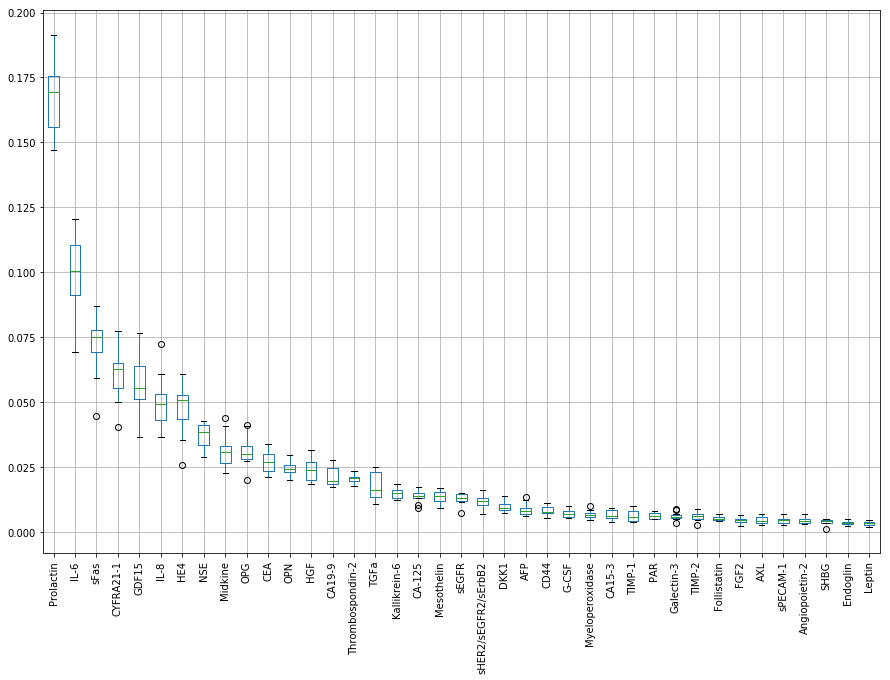

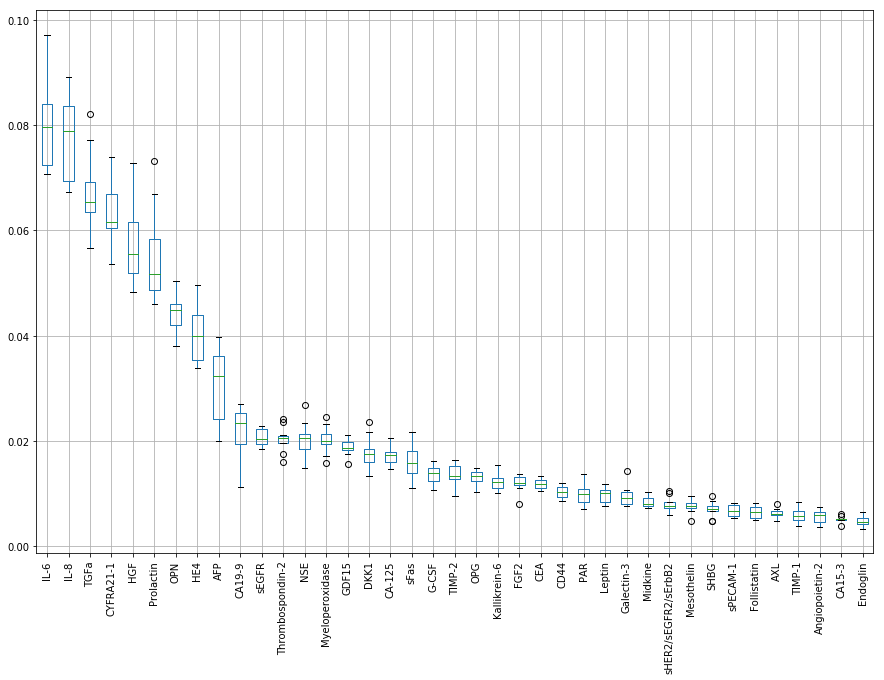

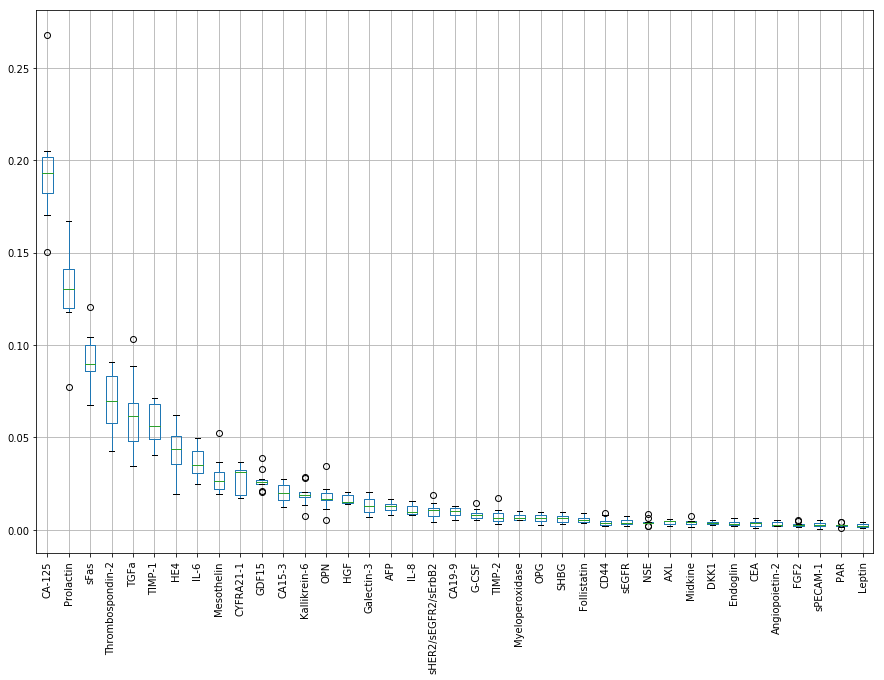

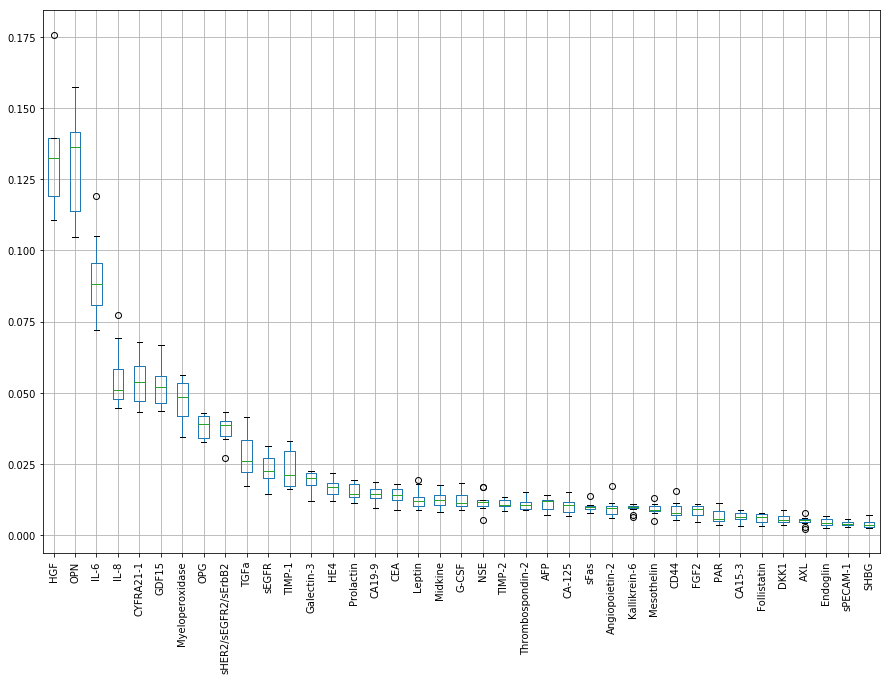

In [41]:
report = {}
for i in models.keys():
    tmp = []
    for j in models[i]:
        tmp.append(j.feature_importances_)
    report[i]=pd.DataFrame(np.vstack(tmp))
    report[i].columns = ddef.loc[features[0],'name']
    sorted_box_plot(report[i].iloc[:,2:],{"figsize":(15,10),"rot":90})
    plt.grid()
    plt.savefig(save_path+i, dpi=200)
    plt.close()